# P3-Anticipez les besoins en consommation électrique de bâtiments : Nettoyage des données et analyse exploratoire

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter as count
import json
from sklearn.impute import KNNImputer

## Importation des données et mise en forme du data set

In [2]:
data_2015 = pd.read_csv("2015-building-energy-benchmarking.csv")
data_2016 = pd.read_csv("2016-building-energy-benchmarking.csv")

### Premier overview des données

In [3]:
print(data_2015.shape)
print(data_2016.shape)

(3340, 47)
(3376, 46)


In [4]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [5]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [6]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [7]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [8]:
count(data_2015['DefaultData'])

Counter({'No': 2791, 'Yes': 548, nan: 1})

In [9]:
count(data_2016['DefaultData'])

Counter({False: 3263, True: 113})

In [10]:
for var in list(data_2016.columns) :
    if var not in list(data_2015.columns) :
        print(var)

Address
City
State
ZipCode
Latitude
Longitude
Comments
TotalGHGEmissions
GHGEmissionsIntensity


In [11]:
for var in list(data_2015.columns) :
    if var not in list(data_2016.columns) :
        print(var)

Location
OtherFuelUse(kBtu)
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)
Comment
2010 Census Tracts
Seattle Police Department Micro Community Policing Plan Areas
City Council Districts
SPD Beats
Zip Codes


### Suppression des variables ne présentant pas d'intérêt pour le projet

In [12]:
data_2016['City'].describe()

count        3376
unique          1
top       Seattle
freq         3376
Name: City, dtype: object

In [13]:
data_2016['State'].describe()

count     3376
unique       1
top         WA
freq      3376
Name: State, dtype: object

In [14]:
data_2016['ZipCode'].describe()

count     3360.000000
mean     98116.949107
std         18.615205
min      98006.000000
25%      98105.000000
50%      98115.000000
75%      98122.000000
max      98272.000000
Name: ZipCode, dtype: float64

In [15]:
print(data_2016.shape)
data_2016 = data_2016.drop(['State','City'], axis=1)
print(data_2016.shape)

(3376, 46)
(3376, 44)


In [16]:
data_2016['ZipCode'] = data_2016['ZipCode'].astype(str)

In [17]:
data_2016['ZipCode'].head(10)

0    98101.0
1    98101.0
2    98101.0
3    98101.0
4    98121.0
5    98101.0
6    98101.0
7    98101.0
8    98104.0
9    98104.0
Name: ZipCode, dtype: object

In [18]:
for i in range(len(data_2016['ZipCode'])) :
    data_2016['ZipCode'][i] = data_2016['ZipCode'][i][0:5]

/tmp/ipykernel_18369/1987589771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016['ZipCode'][i] = data_2016['ZipCode'][i][0:5]


In [19]:
data_2016['ZipCode'].describe()

count      3376
unique       56
top       98109
freq        294
Name: ZipCode, dtype: object

In [20]:
count(data_2016['ZipCode'])

Counter({'98101': 230,
         '98121': 186,
         '98104': 251,
         '98154': 2,
         '98118': 85,
         '98105': 191,
         '98112': 68,
         '98125': 152,
         '98109': 294,
         '98070': 1,
         '98108': 129,
         '98199': 70,
         '98115': 129,
         '98107': 101,
         '98144': 99,
         '98103': 161,
         '98119': 167,
         '98136': 28,
         '98122': 243,
         '98126': 64,
         '98133': 124,
         '98146': 6,
         '98033': 1,
         '98106': 50,
         '98111': 3,
         '98134': 186,
         '98117': 31,
         '98116': 93,
         '98191': 1,
         '98164': 2,
         '98195': 10,
         '98185': 1,
         '98181': 1,
         '98102': 169,
         '98168': 2,
         '98155': 4,
         '98006': 1,
         '98124': 2,
         '98053': 1,
         '98012': 1,
         '98013': 2,
         '98028': 1,
         '98178': 4,
         '98114': 1,
         '98127': 1,
         '98165

In [21]:
count(data_2015['Zip Codes'])

Counter({18081: 234,
         19576: 180,
         18379: 259,
         18800: 90,
         18383: 189,
         18789: 72,
         19579: 155,
         18390: 309,
         18377: 158,
         18235: 70,
         18792: 124,
         18386: 106,
         17919: 93,
         19575: 164,
         19578: 238,
         19581: 62,
         19582: 124,
         17920: 4,
         18385: 62,
         18388: 135,
         19584: 182,
         18798: 31,
         17916: 29,
         18795: 94,
         17923: 1,
         17926: 2,
         18229: 7,
         18376: 163,
         18230: 3})

In [22]:
data_2015['Location'].head(10)

0    {'latitude': '47.61219025', 'longitude': '-122...
1    {'latitude': '47.61310583', 'longitude': '-122...
2    {'latitude': '47.61334897', 'longitude': '-122...
3    {'latitude': '47.61421585', 'longitude': '-122...
4    {'latitude': '47.6137544', 'longitude': '-122....
5    {'latitude': '47.6164389', 'longitude': '-122....
6    {'latitude': '47.6141141', 'longitude': '-122....
7    {'latitude': '47.61290234', 'longitude': '-122...
8    {'latitude': '47.60258934', 'longitude': '-122...
9    {'latitude': '47.60278416', 'longitude': '-122...
Name: Location, dtype: object

In [23]:
data_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [24]:
#Extraction du zip code :
data_2015['ZipCode'] = ''

for i in range(len(data_2015)) :
        liste = data_2015['Location'][i].split(',')
        liste_zpc = liste[5].split(':')
        zip_code = liste_zpc[1][2:(len(liste_zpc[1])-4)]
        data_2015['ZipCode'][i] = zip_code

/tmp/ipykernel_18369/312713869.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015['ZipCode'][i] = zip_code


In [25]:
data_2015['ZipCode'].describe()

count      3340
unique       28
top       98109
freq        300
Name: ZipCode, dtype: object

In [26]:
data_2015['ZipCode'] = data_2015['ZipCode'].astype(float)

In [27]:
data_2015['ZipCode'].describe()

count     3340.000000
mean     98116.737425
std         16.795145
min      98101.000000
25%      98105.000000
50%      98115.000000
75%      98122.000000
max      98199.000000
Name: ZipCode, dtype: float64

In [28]:
#Extraction de la latitude :
data_2015['Latitude'] =''

for i in range(len(data_2015)) :
        liste = data_2015['Location'][i].split(',')
        liste_lat = liste[0].split(':')
        lat_num = liste_lat[1][2:(len(liste_lat[1])-1)]
        data_2015['Latitude'][i] = float(lat_num)

/tmp/ipykernel_18369/1345717396.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015['Latitude'][i] = float(lat_num)


In [29]:
data_2015['Latitude'].describe()

count     3340.000000
unique    3247.000000
top         47.525932
freq         5.000000
Name: Latitude, dtype: float64

In [30]:
#Extraction de la longitude :
data_2015['Longitude'] = ''

for i in range(len(data_2015)) :
        liste = data_2015['Location'][i].split(',')
        liste_long = liste[1].split(':')
        long_num = liste_long[1][2:(len(liste_long[1])-1)]
        data_2015['Longitude'][i] = float(long_num)

/tmp/ipykernel_18369/1520084694.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015['Longitude'][i] = float(long_num)


In [31]:
data_2015['Longitude'].describe()

count     3340.000000
unique    3226.000000
top       -122.300217
freq         5.000000
Name: Longitude, dtype: float64

In [32]:
data_2015['Longitude'] = data_2015['Longitude'].astype(float)

In [33]:
data_2015['Longitude'].describe()

count    3340.000000
mean     -122.335013
std         0.027169
min      -122.413996
25%      -122.350568
50%      -122.332712
75%      -122.319898
max      -122.220470
Name: Longitude, dtype: float64

In [34]:
print(data_2015.shape)
data_2015 = data_2015.drop(['Location', 'Zip Codes'], axis=1)
print(data_2015.shape)

(3340, 50)
(3340, 48)


In [35]:
print(data_2016.shape)
data_2016 = data_2016.drop(['Address'], axis=1)
print(data_2016.shape)

(3376, 44)
(3376, 43)


In [36]:
with open('socrata_metadata_2015-building-energy-benchmarking.json') as mon_fichier:
    file_2015 = json.load(mon_fichier)

In [37]:
file_2015

{'id': 'h7rm-fz6m',
 'name': '2015 Building Energy Benchmarking',
 'assetType': 'dataset',
 'attribution': 'City of Seattle',
 'attributionLink': 'http://www.seattle.gov/environment',
 'averageRating': 0,
 'createdAt': 1492461362,
 'description': "Seattle’s Building Energy Benchmarking and Reporting Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle. Buildings account for 33% of Seattle's core emissions. The benchmarking policy supports Seattle's goals to reduce energy use and greenhouse gas emissions from existing buildings. In 2013, the City of Seattle adopted a Climate Action Plan to achieve zero net greenhouse gas (GHG) emissions by 2050. Annual benchmarking, reporting and disclosing of building performance are foundational elements of creating more market value for energy efficiency.\r\nPer Ordinance (125000), starting with 2015 energy use performanc

In [38]:
with open('socrata_metadata_2016-building-energy-benchmarking.json') as mon_fichier:
    file_2016 = json.load(mon_fichier)

In [39]:
file_2016

{'id': '2bpz-gwpy',
 'name': '2016 Building Energy Benchmarking',
 'assetType': 'dataset',
 'attribution': 'City of Seattle',
 'attributionLink': 'https://www.seattle.gov/energybenchmarking',
 'averageRating': 0,
 'createdAt': 1521070051,
 'description': "Seattle’s Building Energy Benchmarking and Reporting Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle. Buildings account for 33% of Seattle's core emissions. The benchmarking policy supports Seattle's goals to reduce energy use and greenhouse gas emissions from existing buildings. In 2013, the City of Seattle adopted a Climate Action Plan to achieve zero net greenhouse gas (GHG) emissions by 2050. Annual benchmarking, reporting and disclosing of building performance are foundational elements of creating more market value for energy efficiency.\nPer Ordinance (125000), starting with 2015 energy use perf

In [40]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 48 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   CouncilDistrictCode                                            3340 non-null   int64  
 7   Neighborhood                                                

In [41]:
data_2015_corr = data_2015[['SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
                           'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                           'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
                           'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
                           'OtherFuelUse(kBtu)', 'GHGEmissionsIntensity(kgCO2e/ft2)']]
print(data_2015_corr.shape)

(3340, 14)


In [42]:
data_2015_corr.head()

,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissionsIntensity(kgCO2e/ft2)
0,78.9,6981428.0,249.43,80.3,173.5,175.1,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,2.64
1,94.4,8354235.0,263.51,99.0,191.3,195.2,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,2.38
2,96.6,73130656.0,2061.48,99.7,242.7,246.5,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,1.92
3,460.4,28229320.0,1936.34,462.5,636.3,643.2,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,31.38
4,120.1,14829099.0,507.70,122.1,228.8,227.1,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,4.02


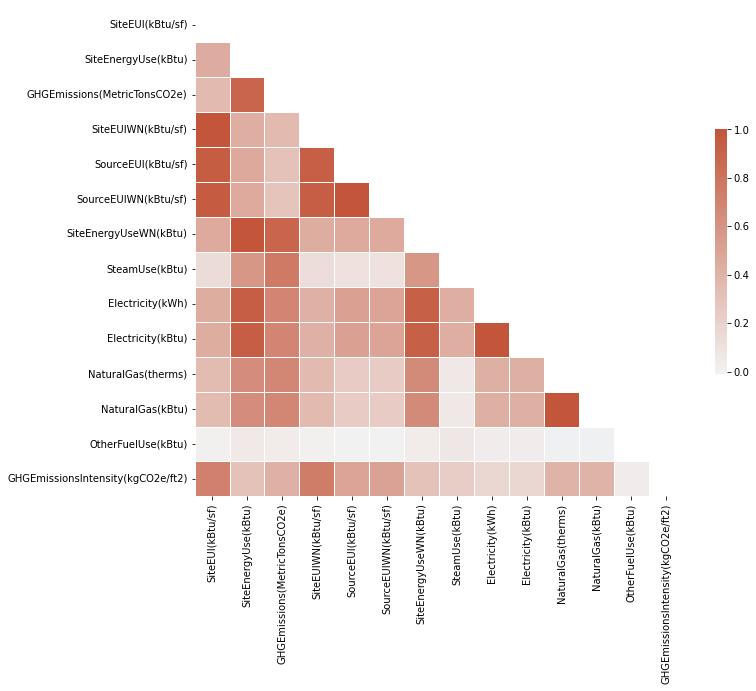

In [43]:
#Heatmap des corrélations :

corr = data_2015_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [44]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   ZipCode                          3376 non-null   object 
 6   TaxParcelIdentificationNumber    3376 non-null   object 
 7   CouncilDistrictCode              3376 non-null   int64  
 8   Neighborhood                     3376 non-null   object 
 9   Latitude                         3376 non-null   float64
 10  Longitude                        3376 non-null   float64
 11  YearBuilt                        3376 non-null   int64  
 12  NumberofBuildings   

In [45]:
data_2016_corr = data_2016[['SiteEUI(kBtu/sf)','TotalGHGEmissions', 'SiteEnergyUse(kBtu)',
                           'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                           'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
                           'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
                           'GHGEmissionsIntensity']]
print(data_2016_corr.shape)

(3376, 13)


In [46]:
data_2016_corr.head()

,SiteEUI(kBtu/sf),TotalGHGEmissions,SiteEnergyUse(kBtu),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissionsIntensity
0,81.699997,249.98,7226362.5,84.300003,182.500000,189.000000,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,2.83
1,94.800003,295.86,8387933.0,97.900002,176.100006,179.399994,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,2.86
2,96.000000,2089.28,72587024.0,97.699997,241.899994,244.100006,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2.19
3,110.800003,286.43,6794584.0,113.300003,216.199997,224.000000,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,4.67
4,114.800003,505.01,14172606.0,118.699997,211.399994,215.600006,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,2.88


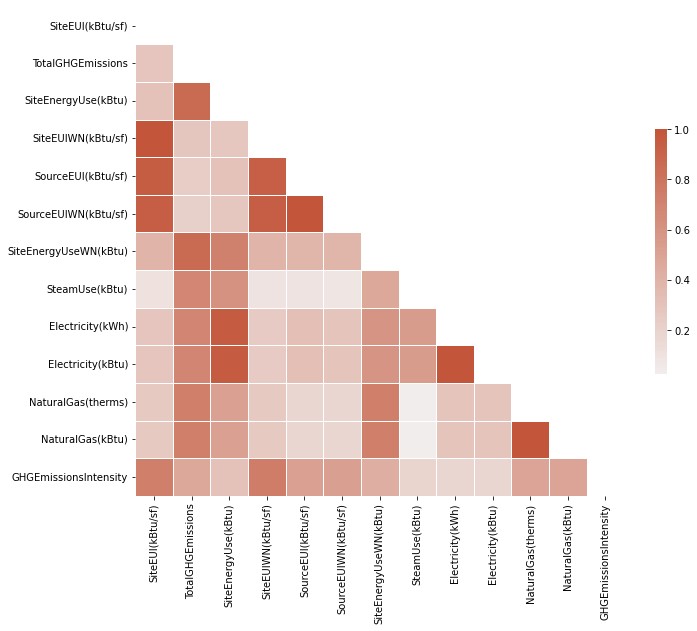

In [47]:
#Heatmap des corrélations :

corr = data_2016_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [48]:
print(data_2015.shape)
data_2015 = data_2015.drop(['PropertyName', 'YearsENERGYSTARCertified', 'SiteEUI(kBtu/sf)',
                           'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                           'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
                           'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
                           'OtherFuelUse(kBtu)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData',
                          'Comment', 'ComplianceStatus'], axis=1)
print(data_2015.shape)

(3340, 48)
(3340, 31)


In [49]:
print(data_2016.shape)
data_2016 = data_2016.drop(['PropertyName', 'YearsENERGYSTARCertified', 'SiteEUI(kBtu/sf)',
                           'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                           'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
                           'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
                           'GHGEmissionsIntensity', 'DefaultData',
                          'Comments', 'ComplianceStatus'], axis=1)
print(data_2016.shape)

(3376, 43)
(3376, 27)


In [50]:
print(data_2015.shape)
print(data_2016.shape)

(3340, 31)
(3376, 27)


In [51]:
for var in list(data_2016.columns) :
    if var not in list(data_2015.columns) :
        print(var)

TotalGHGEmissions


In [52]:
for var in list(data_2015.columns) :
    if var not in list(data_2016.columns) :
        print(var)

GHGEmissions(MetricTonsCO2e)
2010 Census Tracts
Seattle Police Department Micro Community Policing Plan Areas
City Council Districts
SPD Beats


In [53]:
print(data_2015['2010 Census Tracts'].isna().mean())
print(data_2015['Seattle Police Department Micro Community Policing Plan Areas'].isna().mean())
print(data_2015['City Council Districts'].isna().mean())
print(data_2015['SPD Beats'].isna().mean())

0.932934131736527
0.0005988023952095808
0.9362275449101797
0.0005988023952095808


In [54]:
print(data_2015.shape)
data_2015 = data_2015.drop(['2010 Census Tracts', 'SPD Beats', 'City Council Districts',
                           'Seattle Police Department Micro Community Policing Plan Areas'], axis=1)
print(data_2015.shape)

(3340, 31)
(3340, 27)


In [55]:
data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions'}, inplace=True)

In [56]:
list(data_2015.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'Outlier',
 'ZipCode',
 'Latitude',
 'Longitude']

In [57]:
list(data_2016.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'Outlier',
 'TotalGHGEmissions']

### Recherche de doublons

#### Données de 2015

In [58]:
#Suppression des lignes vides
print(data_2015.shape)
data_2015.dropna(how = 'all')
print(data_2015.shape)

(3340, 27)
(3340, 27)


In [59]:
#Nombre de valeur manquante pour la variable 'OSEBuildingID', qui est l'identifiant unique de chaque bâtiment
print('Nomre de valeur manquante :',(data_2015['OSEBuildingID'].isnull().sum()))
print('Taux de valeur manquante :',(round(data_2015['OSEBuildingID'].isna().mean(),4)))

Nomre de valeur manquante : 0
Taux de valeur manquante : 0.0


In [60]:
#Changement du type de variable pour 'OSEBuildingID' :
data_2015['OSEBuildingID'] = data_2015['OSEBuildingID'].astype(str)

In [61]:
data_2015['OSEBuildingID'].describe()

count     3340
unique    3340
top          1
freq         1
Name: OSEBuildingID, dtype: object

#### Données de 2016

In [62]:
#Suppression des lignes vides
print(data_2016.shape)
data_2016.dropna(how = 'all')
print(data_2016.shape)

(3376, 27)
(3376, 27)


In [63]:
#Nombre de valeur manquante pour la variable 'OSEBuildingID', qui est l'identifiant unique de chaque bâtiment
print('Nomre de valeur manquante :',(data_2016['OSEBuildingID'].isnull().sum()))
print('Taux de valeur manquante :',(round(data_2016['OSEBuildingID'].isna().mean(),4)))

Nomre de valeur manquante : 0
Taux de valeur manquante : 0.0


In [64]:
#Changement du type de variable pour 'OSEBuildingID' :
data_2016['OSEBuildingID'] = data_2016['OSEBuildingID'].astype(str)

In [65]:
data_2016['OSEBuildingID'].describe()

count     3376
unique    3376
top          1
freq         1
Name: OSEBuildingID, dtype: object

### Fusion des jeux de données

In [66]:
data = pd.concat([data_2015,data_2016], ignore_index=True)

In [67]:
print(data_2015.shape)
print(data_2016.shape)
print(data.shape)

(3340, 27)
(3376, 27)
(6716, 27)


In [68]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Outlier,ZipCode,Latitude,Longitude
0,1,2015,NonResidential,Hotel,659000030,7,DOWNTOWN,1927,1.0,12.0,...,NaN,NaN,NaN,65.0,6981428.0,249.43,NaN,98101.0,47.61219,-122.337997
1,2,2015,NonResidential,Hotel,659000220,7,DOWNTOWN,1996,1.0,11.0,...,15064.0,Restaurant,4622.0,51.0,8354235.0,263.51,NaN,98101.0,47.613106,-122.333358
2,3,2015,NonResidential,Hotel,659000475,7,DOWNTOWN,1969,1.0,41.0,...,100000.0,Swimming Pool,0.0,18.0,73130656.0,2061.48,NaN,98101.0,47.613349,-122.337699
3,5,2015,NonResidential,Hotel,659000640,7,DOWNTOWN,1926,1.0,10.0,...,NaN,NaN,NaN,1.0,28229320.0,1936.34,High Outlier,98101.0,47.614216,-122.336609
4,8,2015,NonResidential,Hotel,659000970,7,DOWNTOWN,1980,1.0,18.0,...,68009.0,Swimming Pool,0.0,67.0,14829099.0,507.70,NaN,98121.0,47.613754,-122.340924


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   object 
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   TaxParcelIdentificationNumber    6714 non-null   object 
 5   CouncilDistrictCode              6716 non-null   int64  
 6   Neighborhood                     6716 non-null   object 
 7   YearBuilt                        6716 non-null   int64  
 8   NumberofBuildings                6708 non-null   float64
 9   NumberofFloors                   6708 non-null   float64
 10  PropertyGFATotal                 6716 non-null   int64  
 11  PropertyGFAParking               6716 non-null   int64  
 12  PropertyGFABuilding(

In [70]:
print(data.shape)
data = data.drop('OSEBuildingID', axis=1)
print(data.shape)

(6716, 27)
(6716, 26)


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6716 non-null   int64  
 1   BuildingType                     6716 non-null   object 
 2   PrimaryPropertyType              6716 non-null   object 
 3   TaxParcelIdentificationNumber    6714 non-null   object 
 4   CouncilDistrictCode              6716 non-null   int64  
 5   Neighborhood                     6716 non-null   object 
 6   YearBuilt                        6716 non-null   int64  
 7   NumberofBuildings                6708 non-null   float64
 8   NumberofFloors                   6708 non-null   float64
 9   PropertyGFATotal                 6716 non-null   int64  
 10  PropertyGFAParking               6716 non-null   int64  
 11  PropertyGFABuilding(s)           6716 non-null   int64  
 12  ListOfAllPropertyUse

In [72]:
data['CouncilDistrictCode'] = data['CouncilDistrictCode'].astype(str)
data['Neighborhood'] = data['Neighborhood'].astype(str)
data['Latitude'] = data['Latitude'].astype(float)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6716 non-null   int64  
 1   BuildingType                     6716 non-null   object 
 2   PrimaryPropertyType              6716 non-null   object 
 3   TaxParcelIdentificationNumber    6714 non-null   object 
 4   CouncilDistrictCode              6716 non-null   object 
 5   Neighborhood                     6716 non-null   object 
 6   YearBuilt                        6716 non-null   int64  
 7   NumberofBuildings                6708 non-null   float64
 8   NumberofFloors                   6708 non-null   float64
 9   PropertyGFATotal                 6716 non-null   int64  
 10  PropertyGFAParking               6716 non-null   int64  
 11  PropertyGFABuilding(s)           6716 non-null   int64  
 12  ListOfAllPropertyUse

## Analyse descriptive des données et recherche d'outliers

### Outliers identifiés

In [74]:
data.describe()

,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude
count,6716.00000,6716.000000,6708.000000,6708.000000,6.716000e+03,6716.000000,6.716000e+03,6.560000e+03,3238.000000,1156.000000,5093.000000,6.701000e+03,6697.000000,6716.000000,6716.000000
mean,2015.50268,1968.101549,1.071407,4.695736,9.281410e+04,9519.597975,8.329450e+04,7.707936e+04,28074.100153,11262.497750,67.906342,5.194673e+06,114.935638,47.624062,-122.334904
std,0.50003,33.020391,1.593505,5.476218,1.875062e+05,33868.050881,1.733470e+05,1.681617e+05,53473.984688,26287.655182,27.012124,1.813648e+07,478.876573,0.047837,0.027185
min,2015.00000,1900.000000,0.000000,0.000000,1.128500e+04,-3.000000,-5.055000e+04,5.656000e+03,0.000000,0.000000,1.000000,0.000000e+00,-0.800000,47.499170,-122.414250
25%,2015.00000,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.727300e+04,2.501600e+04,4993.000000,2325.000000,52.000000,9.200689e+05,9.450000,47.599857,-122.350603
50%,2016.00000,1974.000000,1.000000,4.000000,4.400800e+04,0.000000,4.218500e+04,3.953000e+04,10631.000000,5039.000000,75.000000,1.791071e+06,33.180000,47.618608,-122.332630
75%,2016.00000,1996.000000,1.000000,5.000000,8.943125e+04,0.000000,8.112000e+04,7.417800e+04,26462.000000,10270.000000,90.000000,4.135280e+06,91.530000,47.657135,-122.319733
max,2016.00000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,8.739237e+08,16870.980000,47.733870,-122.220470


In [75]:
count(data['Outlier'])

Counter({nan: 6600,
         'High Outlier': 46,
         'Low Outlier': 38,
         'High outlier': 9,
         'Low outlier': 23})

In [76]:
print(data.shape)
index_names = data[data['Outlier'] == 'High Outlier'].index 
data.drop(index_names, inplace = True)
print(data.shape)

(6716, 26)
(6670, 26)


In [77]:
print(data.shape)
index_names = data[data['Outlier'] == 'High outlier'].index 
data.drop(index_names, inplace = True)
print(data.shape)

(6670, 26)
(6661, 26)


In [78]:
print(data.shape)
index_names = data[data['Outlier'] == 'Low Outlier'].index 
data.drop(index_names, inplace = True)
print(data.shape)

(6661, 26)
(6623, 26)


In [79]:
print(data.shape)
index_names = data[data['Outlier'] == 'Low outlier'].index 
data.drop(index_names, inplace = True)
print(data.shape)

(6623, 26)
(6600, 26)


In [80]:
print(data.shape)
data = data.drop(['Outlier'], axis=1)
print(data.shape)

(6600, 26)
(6600, 25)


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 0 to 6715
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6600 non-null   int64  
 1   BuildingType                     6600 non-null   object 
 2   PrimaryPropertyType              6600 non-null   object 
 3   TaxParcelIdentificationNumber    6598 non-null   object 
 4   CouncilDistrictCode              6600 non-null   object 
 5   Neighborhood                     6600 non-null   object 
 6   YearBuilt                        6600 non-null   int64  
 7   NumberofBuildings                6592 non-null   float64
 8   NumberofFloors                   6592 non-null   float64
 9   PropertyGFATotal                 6600 non-null   int64  
 10  PropertyGFAParking               6600 non-null   int64  
 11  PropertyGFABuilding(s)           6600 non-null   int64  
 12  ListOfAllPropertyUse

### Analyse des variables qualitatives et quantitatives discrètes

#### BuildingType

In [82]:
data['BuildingType'].value_counts()

NonResidential          2877
Multifamily LR (1-4)    2002
Multifamily MR (5-9)    1115
Multifamily HR (10+)     213
SPS-District K-12        194
Nonresidential COS       152
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [83]:
data['BuildingType'].replace('Nonresidential WA', 'NonResidential', inplace=True)

In [84]:
print(data.shape)
index_names = data[data['BuildingType'] == 'Multifamily LR (1-4)'].index 
data.drop(index_names, inplace = True)
print(data.shape)

(6600, 25)
(4598, 25)


In [85]:
print(data.shape)
index_names = data[data['BuildingType'] == 'Multifamily MR (5-9)'].index 
data.drop(index_names, inplace = True)
print(data.shape)

(4598, 25)
(3483, 25)


In [86]:
print(data.shape)
index_names = data[data['BuildingType'] == 'Multifamily HR (10+)'].index 
data.drop(index_names, inplace = True)
print(data.shape)

(3483, 25)
(3270, 25)


In [87]:
data['BuildingType'].value_counts()

NonResidential        2878
SPS-District K-12      194
Nonresidential COS     152
Campus                  46
Name: BuildingType, dtype: int64

<AxesSubplot:ylabel='BuildingType'>

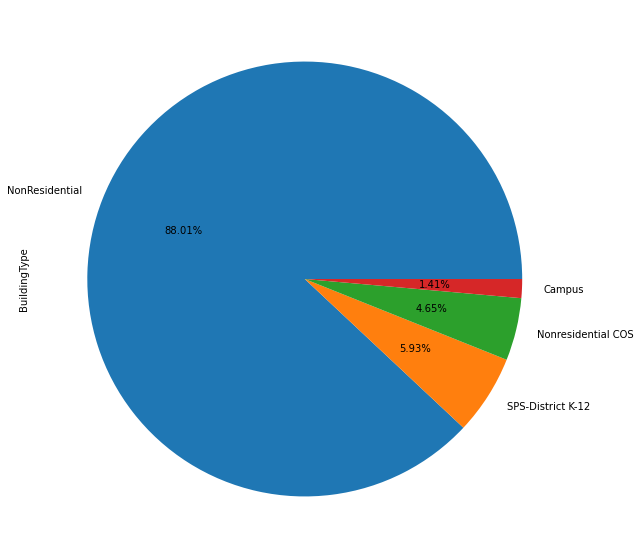

In [88]:
#Analyse de la répartition

fig = plt.figure(figsize = (15,10))
data["BuildingType"].value_counts(normalize=True).plot(
    kind='pie', autopct = lambda x: str(round(x, 2)) + '%')

In [89]:
data['BuildingType'].describe()

count               3270
unique                 4
top       NonResidential
freq                2878
Name: BuildingType, dtype: object

#### PrimaryPropertyType

In [90]:
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    572
Other                          499
Large Office                   331
K-12 School                    271
Mixed Use Property             220
Non-Refrigerated Warehouse     187
Warehouse                      187
Retail Store                   185
Hotel                          146
Worship Facility               141
Medical Office                  82
Distribution Center             55
Distribution Center\n           51
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
University                      24
Residence Hall                  21
College/University              21
Hospital                        20
Residence Hall/Dormitory        15
Restaurant                      13
Restaurant\n                    11
Laboratory                      11
Low-Rise Multifamily             4
SPS-District K-12   

In [91]:
data['PrimaryPropertyType'].replace('Residence Hall', 'Residential', inplace=True)
data['PrimaryPropertyType'].replace('Residence Hall/Dormitory', 'Residential', inplace=True)
data['PrimaryPropertyType'].replace('Low-Rise Multifamily', 'Residential', inplace=True)

In [92]:
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    572
Other                          499
Large Office                   331
K-12 School                    271
Mixed Use Property             220
Non-Refrigerated Warehouse     187
Warehouse                      187
Retail Store                   185
Hotel                          146
Worship Facility               141
Medical Office                  82
Distribution Center             55
Distribution Center\n           51
Supermarket / Grocery Store     40
Residential                     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
University                      24
College/University              21
Hospital                        20
Restaurant                      13
Laboratory                      11
Restaurant\n                    11
SPS-District K-12                4
Office                           3
Name: PrimaryPropert

In [93]:
data['BuildingType'][data['PrimaryPropertyType']=='Residential']

115     NonResidential
186     NonResidential
870     NonResidential
903     NonResidential
947     NonResidential
965     NonResidential
1117    NonResidential
1220    NonResidential
1311            Campus
1765    NonResidential
2481    NonResidential
2573    NonResidential
2808    NonResidential
2811    NonResidential
2812    NonResidential
2814    NonResidential
2839    NonResidential
3455    NonResidential
3526    NonResidential
3984    NonResidential
4198    NonResidential
4230    NonResidential
4274    NonResidential
4292    NonResidential
4444    NonResidential
4550    NonResidential
4640            Campus
5085    NonResidential
5880    NonResidential
6115    NonResidential
6118    NonResidential
6119    NonResidential
6121    NonResidential
6145    NonResidential
6515    NonResidential
6516    NonResidential
6616    NonResidential
6618    NonResidential
6619    NonResidential
6620    NonResidential
Name: BuildingType, dtype: object

In [94]:
data['LargestPropertyUseType'][data['PrimaryPropertyType']=='Residential']

115     Residence Hall/Dormitory
186     Residence Hall/Dormitory
870     Residence Hall/Dormitory
903     Residence Hall/Dormitory
947     Residence Hall/Dormitory
965     Residence Hall/Dormitory
1117    Residence Hall/Dormitory
1220    Residence Hall/Dormitory
1311         Multifamily Housing
1765    Residence Hall/Dormitory
2481         Multifamily Housing
2573    Residence Hall/Dormitory
2808    Residence Hall/Dormitory
2811    Residence Hall/Dormitory
2812    Residence Hall/Dormitory
2814    Residence Hall/Dormitory
2839    Residence Hall/Dormitory
3455    Residence Hall/Dormitory
3526    Residence Hall/Dormitory
3984         Multifamily Housing
4198    Residence Hall/Dormitory
4230    Residence Hall/Dormitory
4274    Residence Hall/Dormitory
4292    Residence Hall/Dormitory
4444    Residence Hall/Dormitory
4550    Residence Hall/Dormitory
4640         Multifamily Housing
5085    Residence Hall/Dormitory
5880    Residence Hall/Dormitory
6115    Residence Hall/Dormitory
6118    Re

In [95]:
data['SecondLargestPropertyUseType'][data['PrimaryPropertyType']=='Residential']

115                           NaN
186                        Office
870                           NaN
903                           NaN
947                       Parking
965                        Office
1117                          NaN
1220                          NaN
1311                 Retail Store
1765                          NaN
2481                Bar/Nightclub
2573                       Office
2808                          NaN
2811                          NaN
2812                          NaN
2814                          NaN
2839                          NaN
3455                          NaN
3526                       Office
3984                          NaN
4198                          NaN
4230                          NaN
4274                      Parking
4292                       Office
4444                          NaN
4550                          NaN
4640                 Retail Store
5085                          NaN
5880                       Office
6115          

In [96]:
index_names = data[data['PrimaryPropertyType']=='Residential'].index 
print(index_names)

Int64Index([ 115,  186,  870,  903,  947,  965, 1117, 1220, 1311, 1765, 2481,
            2573, 2808, 2811, 2812, 2814, 2839, 3455, 3526, 3984, 4198, 4230,
            4274, 4292, 4444, 4550, 4640, 5085, 5880, 6115, 6118, 6119, 6121,
            6145, 6515, 6516, 6616, 6618, 6619, 6620],
           dtype='int64')


In [97]:
index_names_2 = data[data['SecondLargestPropertyUseType'].isnull()].index 
print(index_names_2)

Int64Index([   0,    5,    6,    7,    8,   10,   11,   12,   14,   19,
            ...
            6699, 6701, 6702, 6703, 6706, 6707, 6709, 6710, 6711, 6712],
           dtype='int64', length=1626)


In [98]:
print(data.shape)
for index in index_names :
    if index in index_names_2 :
        data.drop(index, inplace = True)
print(data.shape)

(3270, 25)
(3243, 25)


In [99]:
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    572
Other                          499
Large Office                   331
K-12 School                    271
Mixed Use Property             220
Non-Refrigerated Warehouse     187
Warehouse                      187
Retail Store                   185
Hotel                          146
Worship Facility               141
Medical Office                  82
Distribution Center             55
Distribution Center\n           51
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
University                      24
College/University              21
Hospital                        20
Residential                     13
Restaurant                      13
Laboratory                      11
Restaurant\n                    11
SPS-District K-12                4
Office                           3
Name: PrimaryPropert

In [100]:
data['PrimaryPropertyType'].replace('Residential', 'Residential/Mixte', inplace=True)

In [101]:
data['PrimaryPropertyType'].replace('Non-Refrigerated Warehouse', 'Warehouse', inplace=True)

In [102]:
data['PrimaryPropertyType'].replace('Distribution Center\n', 'Distribution Center', inplace=True)

In [103]:
data['PrimaryPropertyType'].replace('Supermarket / Grocery Store', 'Supermarket/Grocery Store', inplace=True)

In [104]:
data['PrimaryPropertyType'].replace('Self-Storage Facility\n', 'Self-Storage Facility', inplace=True)

In [105]:
data['PrimaryPropertyType'].replace('University', 'College/University', inplace=True)

In [106]:
data['PrimaryPropertyType'].replace('Restaurant\n', 'Restaurant', inplace=True)

In [107]:
data['PrimaryPropertyType'].replace('Senior Care Community', 'Hospital', inplace=True)

In [108]:
data['SiteEnergyUse(kBtu)'][data['PrimaryPropertyType']=='Office']

6706    502667.6875
6709    387810.0000
6711    849745.6875
Name: SiteEnergyUse(kBtu), dtype: float64

In [109]:
data['SiteEnergyUse(kBtu)'][data['PrimaryPropertyType']=='Small- and Mid-Sized Office'].describe()

count    5.710000e+02
mean     2.622100e+06
std      2.450617e+06
min      3.427261e+05
25%      1.260585e+06
50%      2.058533e+06
75%      3.216452e+06
max      3.795171e+07
Name: SiteEnergyUse(kBtu), dtype: float64

In [110]:
data['SiteEnergyUse(kBtu)'][data['PrimaryPropertyType']=='Large Office'].describe()

count    3.310000e+02
mean     1.730990e+07
std      1.549887e+07
min      0.000000e+00
25%      7.018911e+06
50%      1.196343e+07
75%      2.033539e+07
max      9.456009e+07
Name: SiteEnergyUse(kBtu), dtype: float64

In [111]:
data['TotalGHGEmissions'][data['PrimaryPropertyType']=='Office']

6706     3.50
6709     7.79
6711    20.94
Name: TotalGHGEmissions, dtype: float64

In [112]:
data['TotalGHGEmissions'][data['PrimaryPropertyType']=='Small- and Mid-Sized Office'].describe()

count    571.000000
mean      40.113538
std       43.311904
min       -0.800000
25%       13.845000
50%       25.530000
75%       46.890000
max      293.550000
Name: TotalGHGEmissions, dtype: float64

In [113]:
data['TotalGHGEmissions'][data['PrimaryPropertyType']=='Large Office'].describe()

count     331.000000
mean      203.318610
std       207.956824
min         0.000000
25%        65.115000
50%       129.020000
75%       241.885000
max      1241.230000
Name: TotalGHGEmissions, dtype: float64

In [114]:
data['PrimaryPropertyType'].replace('Small- and Mid-Sized Office', 'Office', inplace=True)
data['PrimaryPropertyType'].replace('Large Office', 'Office', inplace=True)

In [115]:
data['PrimaryPropertyType'].value_counts()

Office                       906
Other                        499
Warehouse                    374
K-12 School                  271
Mixed Use Property           220
Retail Store                 185
Hotel                        146
Worship Facility             141
Distribution Center          106
Medical Office                82
Supermarket/Grocery Store     76
Hospital                      59
Self-Storage Facility         56
College/University            45
Refrigerated Warehouse        25
Restaurant                    24
Residential/Mixte             13
Laboratory                    11
SPS-District K-12              4
Name: PrimaryPropertyType, dtype: int64

In [116]:
data['PrimaryPropertyType'].replace('Residential/Mixte', 'Mixed Use Property', inplace=True)

<AxesSubplot:ylabel='PrimaryPropertyType'>

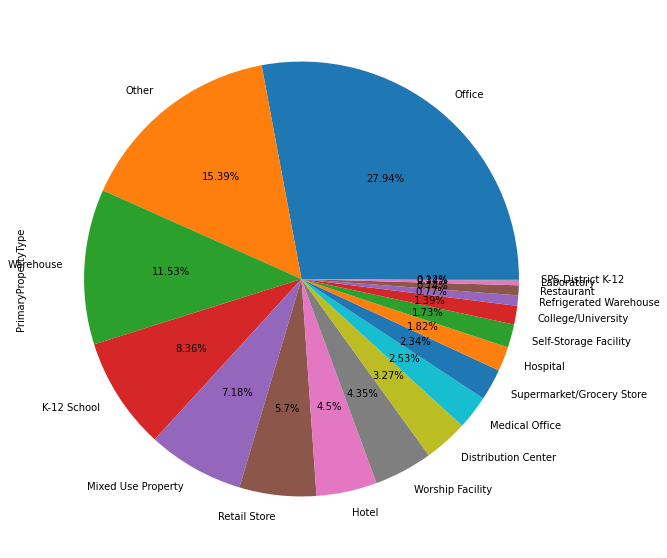

In [117]:
#Analyse de la répartition

fig = plt.figure(figsize = (15,10))
data["PrimaryPropertyType"].value_counts(normalize=True).plot(
    kind='pie', autopct = lambda x: str(round(x, 2)) + '%')

In [118]:
data['PrimaryPropertyType'].describe()

count       3243
unique        18
top       Office
freq         906
Name: PrimaryPropertyType, dtype: object

#### LargestPropertyUseType

In [119]:
data['LargestPropertyUseType'].value_counts()

Office                                                  946
Non-Refrigerated Warehouse                              393
K-12 School                                             271
Other                                                   195
Retail Store                                            192
Hotel                                                   141
Worship Facility                                        139
Distribution Center                                     106
Medical Office                                           84
Supermarket/Grocery Store                                78
Parking                                                  56
Self-Storage Facility                                    54
Other - Recreation                                       51
College/University                                       44
Other - Entertainment/Public Assembly                    41
Senior Care Community                                    39
Refrigerated Warehouse                  

In [120]:
data['LargestPropertyUseType'].replace('Multifamily Housing', 'Residential', inplace=True)
data['LargestPropertyUseType'].replace('Residence Hall/Dormitory', 'Residential', inplace=True)
data['LargestPropertyUseType'].replace('Other - Lodging/Residential', 'Residential', inplace=True)

In [121]:
data['LargestPropertyUseType'].value_counts()

Office                                                  946
Non-Refrigerated Warehouse                              393
K-12 School                                             271
Other                                                   195
Retail Store                                            192
Hotel                                                   141
Worship Facility                                        139
Distribution Center                                     106
Medical Office                                           84
Supermarket/Grocery Store                                78
Parking                                                  56
Self-Storage Facility                                    54
Other - Recreation                                       51
College/University                                       44
Residential                                              43
Other - Entertainment/Public Assembly                    41
Senior Care Community                   

In [122]:
data['SecondLargestPropertyUseType'][data['LargestPropertyUseType']=='Residential']

113                                    Office
163                 Supermarket/Grocery Store
186                                    Office
947                                   Parking
965                                    Office
1170                                   Office
1311                             Retail Store
1858                                   Office
1950                                  Parking
2341                                    Hotel
2422                                  Parking
2435                      Multifamily Housing
2481                            Bar/Nightclub
2573                                   Office
2743                                      NaN
2781                             Retail Store
2807                                      NaN
3033                                      NaN
3042                Supermarket/Grocery Store
3080                                  Parking
3129    Other - Entertainment/Public Assembly
3453                              

In [123]:
index_names = data[data['LargestPropertyUseType']=='Residential'].index 
print(index_names)

Int64Index([ 113,  163,  186,  947,  965, 1170, 1311, 1858, 1950, 2341, 2422,
            2435, 2481, 2573, 2743, 2781, 2807, 3033, 3042, 3080, 3129, 3453,
            3504, 3526, 4274, 4292, 4499, 4640, 5179, 5268, 5654, 5734, 5747,
            5880, 6051, 6088, 6114, 6335, 6343, 6381, 6427, 6516, 6616],
           dtype='int64')


In [124]:
print(data.shape)
for index in index_names :
    if index in index_names_2 :
        data.drop(index, inplace = True)
print(data.shape)

(3243, 25)
(3237, 25)


In [125]:
data['LargestPropertyUseType'].replace('Residential', 'Mixed Use Property', inplace=True)

In [126]:
data['LargestPropertyUseType'].replace('Other/Specialty Hospital', 'Hospital', inplace=True)
data['LargestPropertyUseType'].replace('Hospital (General Medical & Surgical)', 'Hospital', inplace=True)
data['LargestPropertyUseType'].replace('Outpatient Rehabilitation/Physical Therapy', 'Hospital', inplace=True)
data['LargestPropertyUseType'].replace('Urgent Care/Clinic/Other Outpatient', 'Hospital', inplace=True)

In [127]:
data['LargestPropertyUseType'].replace('Senior Care Community', 'Hospital', inplace=True)

In [128]:
data['LargestPropertyUseType'].replace('Residential Care Facility', 'Hospital', inplace=True)

In [129]:
data['LargestPropertyUseType'].replace('Strip Mall', 'Other - Mall', inplace=True)
data['LargestPropertyUseType'].replace('Strip Mall', 'Other - Mall', inplace=True)

In [130]:
data['LargestPropertyUseType'].replace('Wholesale Club/Supercenter', 'Other - Mall', inplace=True)

In [131]:
data['LargestPropertyUseType'].replace('Bank Branch', 'Financial Office', inplace=True)

In [132]:
data['LargestPropertyUseType'].replace('Other - Recreation', 'Other - Entertainment/Public Assembly', inplace=True)

In [133]:
data['LargestPropertyUseType'].replace('Retail Store', 'Supermarket/Grocery Store', inplace=True)

In [134]:
data['LargestPropertyUseType'].replace('Fitness Center/Health Club/Gym',
                                       'Lifestyle Center / Fitness Center ', inplace=True)

In [135]:
data['LargestPropertyUseType'].replace('Adult Education', 'Other - Education', inplace=True)
data['LargestPropertyUseType'].replace('Pre-school/Daycare', 'Other - Education', inplace=True)

In [136]:
data['LargestPropertyUseType'].replace('Personal Services (Health/Beauty, Dry Cleaning, etc)',
                                       'Other - Services', inplace=True)
data['LargestPropertyUseType'].replace('Food Service','Other - Services', inplace=True)
data['LargestPropertyUseType'].replace('Repair Services (Vehicle, Shoe, Locksmith, etc)',
                                       'Other - Services', inplace=True)

In [137]:
data['LargestPropertyUseType'].replace('Courthouse', 'Other - Public Services', inplace=True)
data['LargestPropertyUseType'].replace('Police Station', 'Other - Public Services', inplace=True)
data['LargestPropertyUseType'].replace('Fire Station', 'Other - Public Services', inplace=True)

In [138]:
data['LargestPropertyUseType'].replace('Restaurant', 'Other - Restaurant/Bar', inplace=True)

In [139]:
data['LargestPropertyUseType'].value_counts()

Office                                   946
Non-Refrigerated Warehouse               393
K-12 School                              271
Supermarket/Grocery Store                270
Other                                    195
Hotel                                    141
Worship Facility                         139
Distribution Center                      106
Other - Entertainment/Public Assembly     92
Medical Office                            84
Hospital                                  77
Parking                                   56
Self-Storage Facility                     54
College/University                        44
Mixed Use Property                        37
Other - Restaurant/Bar                    28
Other - Services                          26
Refrigerated Warehouse                    24
Laboratory                                22
Other - Mall                              21
Social/Meeting Hall                       20
Other - Education                         16
Financial 

<AxesSubplot:ylabel='LargestPropertyUseType'>

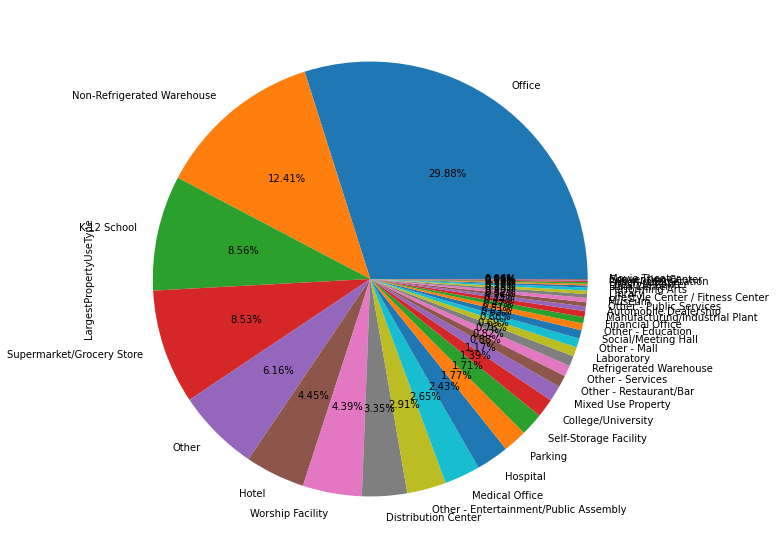

In [140]:
#Analyse de la répartition

fig = plt.figure(figsize = (15,10))
data["LargestPropertyUseType"].value_counts(normalize=True).plot(
    kind='pie', autopct = lambda x: str(round(x, 2)) + '%')

In [141]:
data['LargestPropertyUseType'].describe()

count       3166
unique        36
top       Office
freq         946
Name: LargestPropertyUseType, dtype: object

#### SecondLargestPropertyUseType 

In [142]:
data['SecondLargestPropertyUseType'].value_counts()

Parking                                                 641
Office                                                  326
Retail Store                                            170
Other                                                    84
Non-Refrigerated Warehouse                               61
Restaurant                                               60
Fitness Center/Health Club/Gym                           26
Multifamily Housing                                      24
Data Center                                              22
Other - Services                                         21
Supermarket/Grocery Store                                20
Medical Office                                           17
Other - Entertainment/Public Assembly                    16
Bank Branch                                              13
Distribution Center                                      13
Laboratory                                               12
K-12 School                             

In [143]:
data['SecondLargestPropertyUseType'].replace('Multifamily Housing', 'Residential', inplace=True)
data['SecondLargestPropertyUseType'].replace('Residence Hall/Dormitory', 'Residential', inplace=True)
data['SecondLargestPropertyUseType'].replace('Other - Lodging/Residential', 'Residential', inplace=True)

In [144]:
data['SecondLargestPropertyUseType'].value_counts()

Parking                                                 641
Office                                                  326
Retail Store                                            170
Other                                                    84
Non-Refrigerated Warehouse                               61
Restaurant                                               60
Residential                                              28
Fitness Center/Health Club/Gym                           26
Data Center                                              22
Other - Services                                         21
Supermarket/Grocery Store                                20
Medical Office                                           17
Other - Entertainment/Public Assembly                    16
Bank Branch                                              13
Distribution Center                                      13
Laboratory                                               12
K-12 School                             

In [145]:
index_names = data[data['SecondLargestPropertyUseType']=='Residential'].index 
print(index_names)

Int64Index([ 145,  490,  514,  544,  737,  925,  935, 1178, 1326, 1793, 2435,
            2563, 2825, 3204, 3486, 3828, 3851, 3881, 4071, 4252, 4262, 4507,
            4655, 5113, 5747, 5870, 6131, 6503],
           dtype='int64')


In [146]:
index_names_3 = data[data['ThirdLargestPropertyUseType'].isnull()].index 
print(index_names_3)

Int64Index([   0,    5,    6,    7,    8,   10,   11,   12,   13,   14,
            ...
            6699, 6701, 6702, 6703, 6706, 6707, 6709, 6710, 6711, 6712],
           dtype='int64', length=2559)


In [147]:
print(data.shape)
for index in index_names :
    if index in index_names_3 :
        data.drop(index, inplace = True)
print(data.shape)

(3237, 25)
(3231, 25)


In [148]:
data['SecondLargestPropertyUseType'].replace('Residential', 'Mixed Use Property', inplace=True)

In [149]:
data['SecondLargestPropertyUseType'].replace('Other/Specialty Hospital', 'Hospital', inplace=True)
data['SecondLargestPropertyUseType'].replace('Hospital (General Medical & Surgical)', 'Hospital', inplace=True)
data['SecondLargestPropertyUseType'].replace('Outpatient Rehabilitation/Physical Therapy',
                                             'Hospital', inplace=True)
data['SecondLargestPropertyUseType'].replace('Urgent Care/Clinic/Other Outpatient', 'Hospital', inplace=True)
data['SecondLargestPropertyUseType'].replace('Senior Care Community', 'Hospital', inplace=True)
data['SecondLargestPropertyUseType'].replace('Residential Care Facility', 'Hospital', inplace=True)

In [150]:
data['SecondLargestPropertyUseType'].replace('Strip Mall', 'Other - Mall', inplace=True)
data['SecondLargestPropertyUseType'].replace('Strip Mall', 'Other - Mall', inplace=True)
data['SecondLargestPropertyUseType'].replace('Wholesale Club/Supercenter', 'Other - Mall', inplace=True)

In [151]:
data['SecondLargestPropertyUseType'].replace('Enclosed Mall', 'Other - Mall', inplace=True)

In [152]:
data['SecondLargestPropertyUseType'].replace('Bank Branch', 'Financial Office', inplace=True)

In [153]:
data['SecondLargestPropertyUseType'].replace('Other - Recreation',
                                             'Other - Entertainment/Public Assembly', inplace=True)

In [154]:
data['SecondLargestPropertyUseType'].replace('Retail Store', 'Supermarket/Grocery Store', inplace=True)

In [155]:
data['SecondLargestPropertyUseType'].replace('Food Sales', 'Supermarket/Grocery Store', inplace=True)
data['SecondLargestPropertyUseType'].replace('Convenience Store without Gas Station',
                                             'Supermarket/Grocery Store', inplace=True)

In [156]:
data['SecondLargestPropertyUseType'].replace('Fitness Center/Health Club/Gym',
                                       'Lifestyle Center / Fitness Center ', inplace=True)

In [157]:
data['SecondLargestPropertyUseType'].replace('Adult Education', 'Other - Education', inplace=True)
data['SecondLargestPropertyUseType'].replace('Pre-school/Daycare', 'Other - Education', inplace=True)

In [158]:
data['SecondLargestPropertyUseType'].replace('Vocational School', 'Other - Education', inplace=True)

In [159]:
data['SecondLargestPropertyUseType'].replace('Personal Services (Health/Beauty, Dry Cleaning, etc)',
                                       'Other - Services', inplace=True)
data['SecondLargestPropertyUseType'].replace('Food Service','Other - Services', inplace=True)
data['SecondLargestPropertyUseType'].replace('Repair Services (Vehicle, Shoe, Locksmith, etc)',
                                       'Other - Services', inplace=True)

In [160]:
data['SecondLargestPropertyUseType'].replace('Courthouse', 'Other - Public Services', inplace=True)
data['SecondLargestPropertyUseType'].replace('Police Station', 'Other - Public Services', inplace=True)
data['SecondLargestPropertyUseType'].replace('Fire Station', 'Other - Public Services', inplace=True)

In [161]:
data['SecondLargestPropertyUseType'].replace('Bar/Nightclub', 'Other - Restaurant/Bar', inplace=True)

In [162]:
data['SecondLargestPropertyUseType'].replace('Restaurant', 'Other - Restaurant/Bar', inplace=True)

In [163]:
data['SecondLargestPropertyUseType'].value_counts()

Parking                                  641
Office                                   326
Supermarket/Grocery Store                196
Other                                     84
Other - Restaurant/Bar                    69
Non-Refrigerated Warehouse                61
Other - Services                          32
Lifestyle Center / Fitness Center         26
Other - Entertainment/Public Assembly     24
Mixed Use Property                        22
Data Center                               22
Medical Office                            17
Financial Office                          15
Distribution Center                       13
Laboratory                                12
Other - Education                         11
K-12 School                               10
Swimming Pool                              7
Other - Public Services                    7
Hotel                                      6
Self-Storage Facility                      6
Movie Theater                              5
Worship Fa

<AxesSubplot:ylabel='SecondLargestPropertyUseType'>

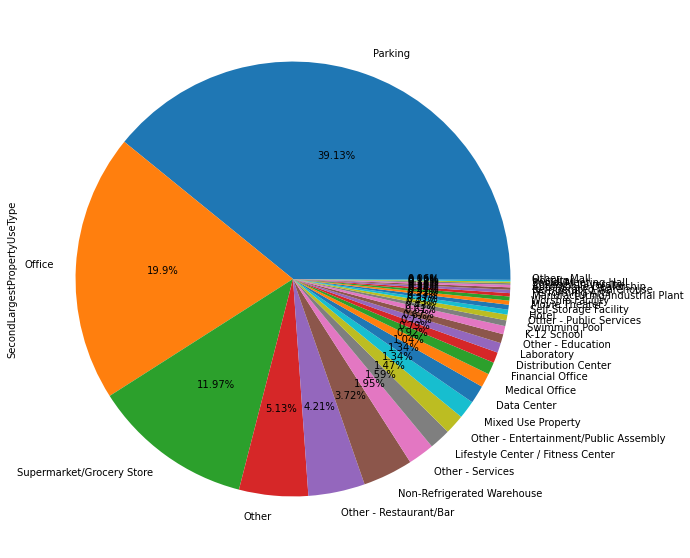

In [164]:
#Analyse de la répartition

fig = plt.figure(figsize = (15,10))
data["SecondLargestPropertyUseType"].value_counts(normalize=True).plot(
    kind='pie', autopct = lambda x: str(round(x, 2)) + '%')

In [165]:
data['SecondLargestPropertyUseType'].describe()

count        1638
unique         31
top       Parking
freq          641
Name: SecondLargestPropertyUseType, dtype: object

#### ThirdLargestPropertyUseType

In [166]:
data['ThirdLargestPropertyUseType'].value_counts()

Office                                                  95
Retail Store                                            92
Parking                                                 86
Other                                                   82
Restaurant                                              64
Non-Refrigerated Warehouse                              29
Data Center                                             22
Multifamily Housing                                     21
Swimming Pool                                           19
Medical Office                                          18
Social/Meeting Hall                                     16
Food Service                                            16
Pre-school/Daycare                                      12
Bank Branch                                             10
Other - Restaurant/Bar                                   9
Financial Office                                         8
Other - Entertainment/Public Assembly                   

In [167]:
data['ThirdLargestPropertyUseType'].replace('Other/Specialty Hospital', 'Hospital', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Hospital (General Medical & Surgical)', 'Hospital', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Outpatient Rehabilitation/Physical Therapy',
                                             'Hospital', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Urgent Care/Clinic/Other Outpatient', 'Hospital', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Senior Care Community', 'Hospital', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Residential Care Facility', 'Hospital', inplace=True)

In [168]:
data['ThirdLargestPropertyUseType'].replace('Strip Mall', 'Other - Mall', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Strip Mall', 'Other - Mall', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Wholesale Club/Supercenter', 'Other - Mall', inplace=True)

In [169]:
data['ThirdLargestPropertyUseType'].replace('Enclosed Mall', 'Other - Mall', inplace=True)

In [170]:
data['ThirdLargestPropertyUseType'].replace('Bank Branch', 'Financial Office', inplace=True)

In [171]:
data['ThirdLargestPropertyUseType'].replace('Other - Recreation',
                                             'Other - Entertainment/Public Assembly', inplace=True)

In [172]:
data['ThirdLargestPropertyUseType'].replace('Retail Store', 'Supermarket/Grocery Store', inplace=True)

In [173]:
data['ThirdLargestPropertyUseType'].replace('Food Sales', 'Supermarket/Grocery Store', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Convenience Store without Gas Station',
                                             'Supermarket/Grocery Store', inplace=True)

In [174]:
data['ThirdLargestPropertyUseType'].replace('Fitness Center/Health Club/Gym',
                                       'Lifestyle Center / Fitness Center ', inplace=True)

In [175]:
data['ThirdLargestPropertyUseType'].replace('Adult Education', 'Other - Education', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Pre-school/Daycare', 'Other - Education', inplace=True)

In [176]:
data['ThirdLargestPropertyUseType'].replace('Vocational School', 'Other - Education', inplace=True)

In [177]:
data['ThirdLargestPropertyUseType'].replace('Personal Services (Health/Beauty, Dry Cleaning, etc)',
                                       'Other - Services', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Food Service','Other - Services', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Repair Services (Vehicle, Shoe, Locksmith, etc)',
                                       'Other - Services', inplace=True)

In [178]:
data['ThirdLargestPropertyUseType'].replace('Courthouse', 'Other - Public Services', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Police Station', 'Other - Public Services', inplace=True)
data['ThirdLargestPropertyUseType'].replace('Fire Station', 'Other - Public Services', inplace=True)

In [179]:
data['ThirdLargestPropertyUseType'].replace('Bar/Nightclub', 'Other - Restaurant/Bar', inplace=True)

In [180]:
data['ThirdLargestPropertyUseType'].replace('Restaurant', 'Other - Restaurant/Bar', inplace=True)

In [181]:
data['ThirdLargestPropertyUseType'].replace('Fast Food Restaurant', 'Other - Restaurant/Bar', inplace=True)

In [182]:
data['ThirdLargestPropertyUseType'].value_counts()

Supermarket/Grocery Store                98
Office                                   95
Parking                                  86
Other                                    82
Other - Restaurant/Bar                   77
Non-Refrigerated Warehouse               29
Other - Services                         24
Data Center                              22
Multifamily Housing                      21
Swimming Pool                            19
Medical Office                           18
Financial Office                         18
Other - Education                        17
Social/Meeting Hall                      16
Other - Entertainment/Public Assembly    12
Lifestyle Center / Fitness Center         7
Distribution Center                       6
K-12 School                               4
Laboratory                                4
Self-Storage Facility                     4
Refrigerated Warehouse                    4
Other - Technology/Science                3
Manufacturing/Industrial Plant  

<AxesSubplot:ylabel='ThirdLargestPropertyUseType'>

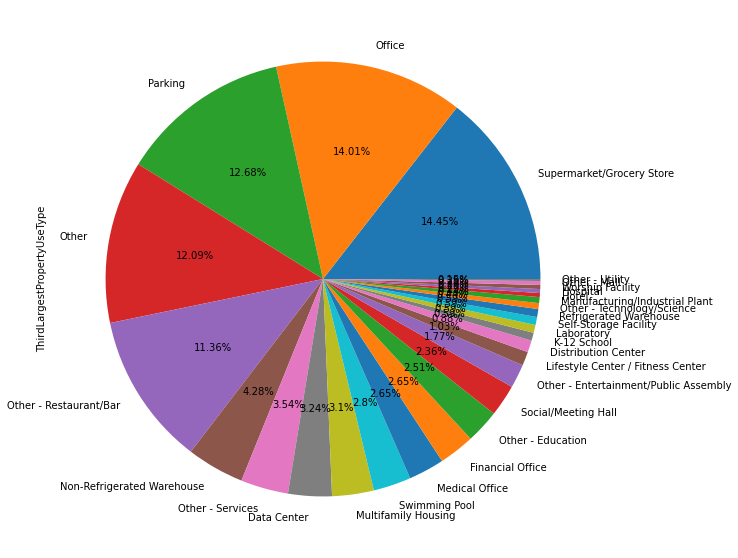

In [183]:
#Analyse de la répartition

fig = plt.figure(figsize = (15,10))
data["ThirdLargestPropertyUseType"].value_counts(normalize=True).plot(
    kind='pie', autopct = lambda x: str(round(x, 2)) + '%')

In [184]:
data['ThirdLargestPropertyUseType'].describe()

count                           678
unique                           28
top       Supermarket/Grocery Store
freq                             98
Name: ThirdLargestPropertyUseType, dtype: object

#### CouncilDistrictCode

In [185]:
data['CouncilDistrictCode'].value_counts()

7    1034
2     780
3     394
4     300
5     264
1     233
6     226
Name: CouncilDistrictCode, dtype: int64

<AxesSubplot:ylabel='CouncilDistrictCode'>

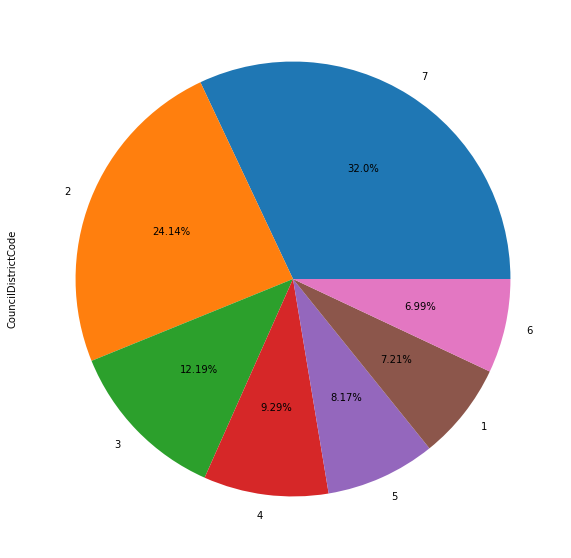

In [186]:
#Analyse de la répartition

fig = plt.figure(figsize = (15,10))
data["CouncilDistrictCode"].value_counts(normalize=True).plot(
    kind='pie', autopct = lambda x: str(round(x, 2)) + '%')

In [187]:
data['CouncilDistrictCode'].describe()

count     3231
unique       7
top          7
freq      1034
Name: CouncilDistrictCode, dtype: object

#### Neighborhood

In [188]:
data['Neighborhood'].value_counts()

DOWNTOWN                  707
GREATER DUWAMISH          679
MAGNOLIA / QUEEN ANNE     292
LAKE UNION                286
EAST                      239
NORTHEAST                 216
NORTHWEST                 169
BALLARD                   132
NORTH                     123
CENTRAL                   100
SOUTHEAST                  92
DELRIDGE                   87
SOUTHWEST                  80
North                       9
Ballard                     6
Northwest                   5
Central                     4
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [189]:
data['Neighborhood'] = data.Neighborhood.str.upper().replace('\s+', '', regex=True)

In [190]:
data['Neighborhood'].replace('DELRIDGENEIGHBORHOODS', 'DELRIDGE', inplace=True)

In [191]:
data['Neighborhood'].value_counts()

DOWNTOWN              707
GREATERDUWAMISH       679
MAGNOLIA/QUEENANNE    292
LAKEUNION             286
EAST                  239
NORTHEAST             216
NORTHWEST             174
BALLARD               138
NORTH                 132
CENTRAL               104
SOUTHEAST              92
DELRIDGE               92
SOUTHWEST              80
Name: Neighborhood, dtype: int64

<AxesSubplot:ylabel='Neighborhood'>

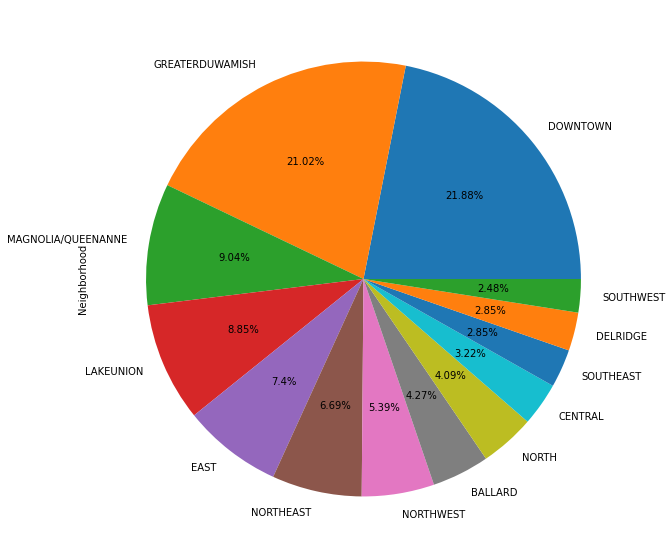

In [192]:
#Analyse de la répartition

fig = plt.figure(figsize = (15,10))
data["Neighborhood"].value_counts(normalize=True).plot(
    kind='pie', autopct = lambda x: str(round(x, 2)) + '%')

In [193]:
data['Neighborhood'].describe()

count         3231
unique          13
top       DOWNTOWN
freq           707
Name: Neighborhood, dtype: object

In [194]:
#je supprime 'DataYear'
data=data.drop(['DataYear'], axis=1)

#### YearBuilt

[Text(0, 0.5, 'Années de construction'), Text(0.5, 0, 'Nombre de bâtiments')]

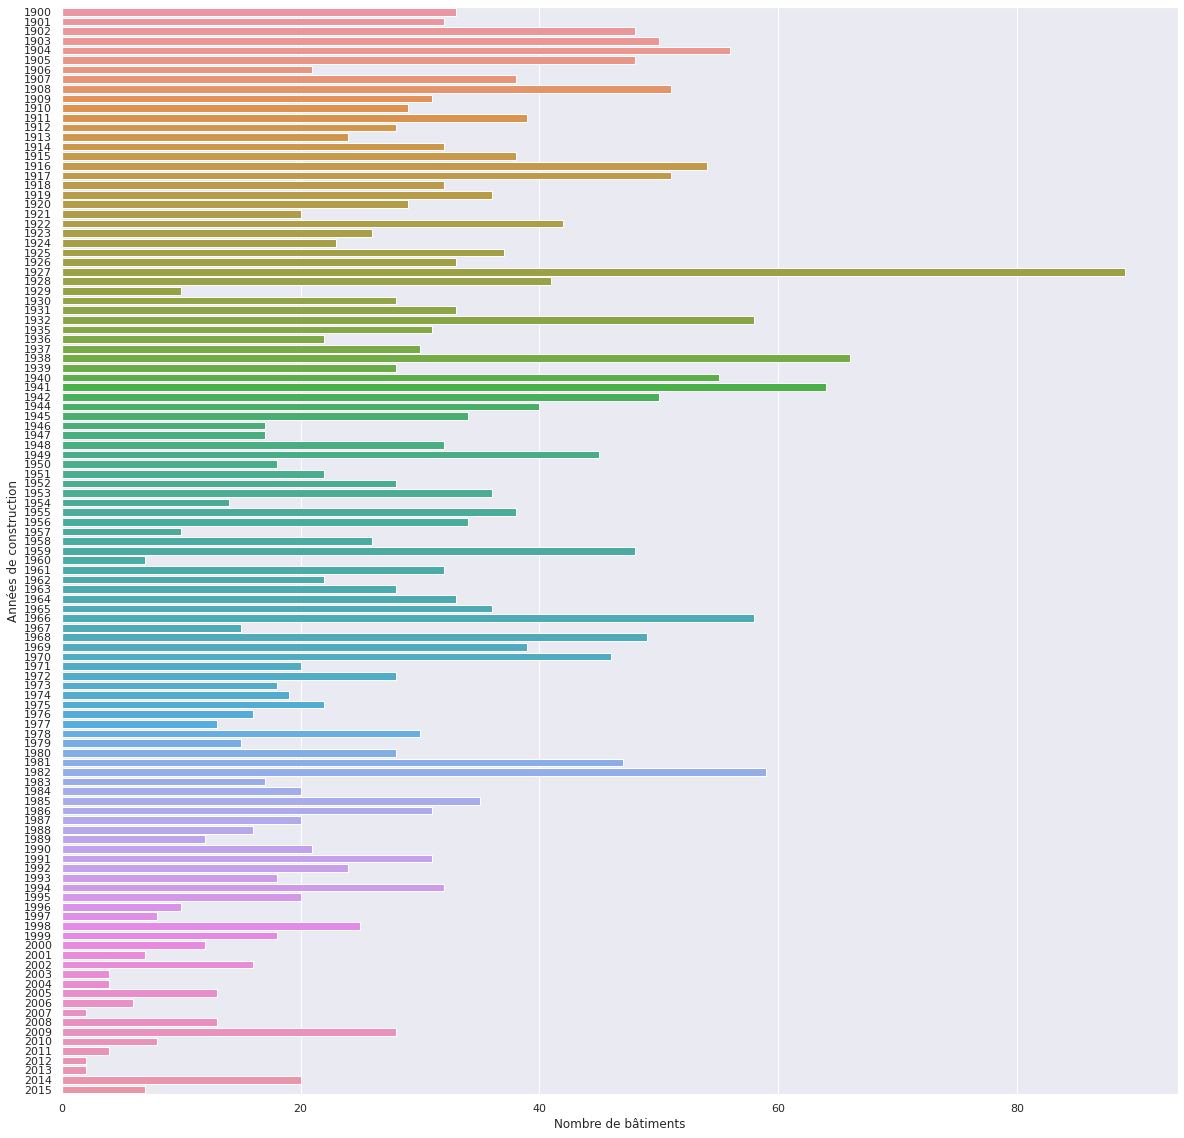

In [195]:
count_YearBuilt = count(data["YearBuilt"])

sns.set(rc = {'figure.figsize' : (20,20)})

categories = list(count_YearBuilt.keys())
categories = sorted(categories)
effectifs = list(count_YearBuilt.values())

fig = sns.barplot(x=effectifs, y=categories, orient='h')
fig.set(ylabel = 'Années de construction', xlabel = 'Nombre de bâtiments')

#### ZipCode

In [196]:
data['ZipCode'] = round(data['ZipCode'].astype(float))

<AxesSubplot:xlabel='ZipCode'>

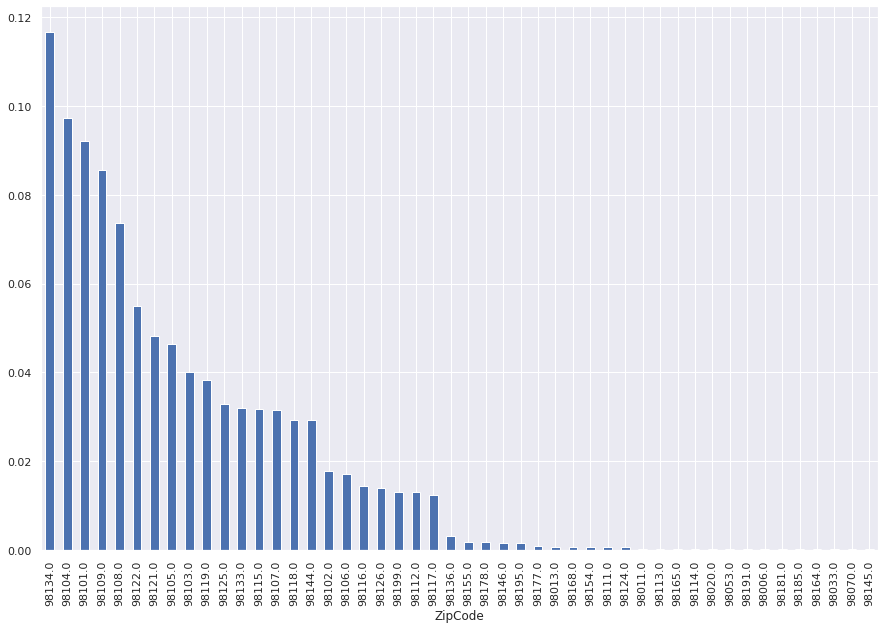

In [197]:
#Analyse en barplot
fig = plt.figure(figsize = (15,10))
data["ZipCode"].value_counts(normalize=True).plot(
    kind='bar', xlabel='ZipCode')

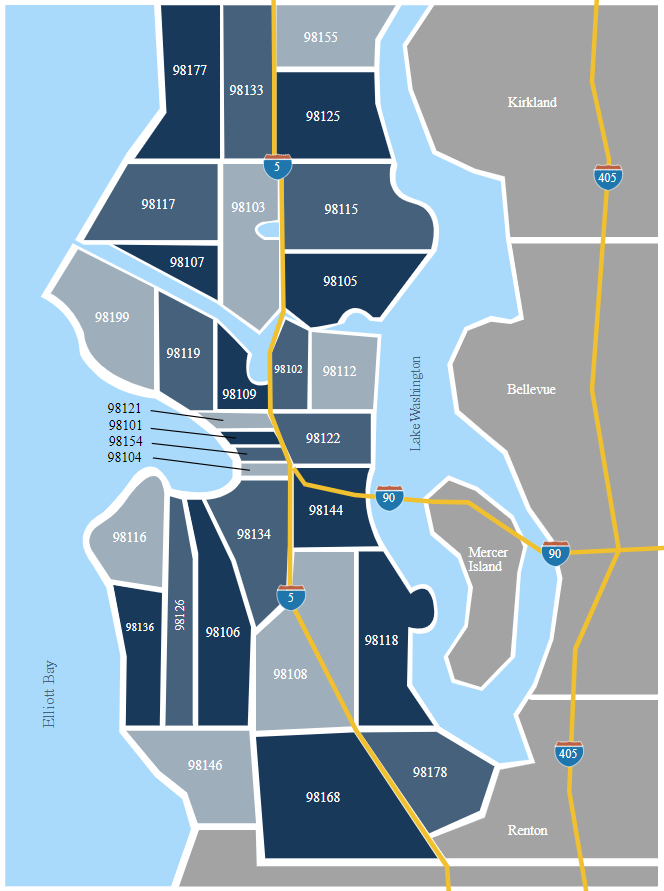

#### TaxParcelIdentificationNumber

In [198]:
data['TaxParcelIdentificationNumber'].describe()

count           3230
unique          1801
top       3224049012
freq              10
Name: TaxParcelIdentificationNumber, dtype: object

In [199]:
print(data.shape)
data = data.drop(['TaxParcelIdentificationNumber'], axis=1)
print(data.shape)

(3231, 24)
(3231, 23)


### Analyse des variables quantitatives continues

<AxesSubplot:>

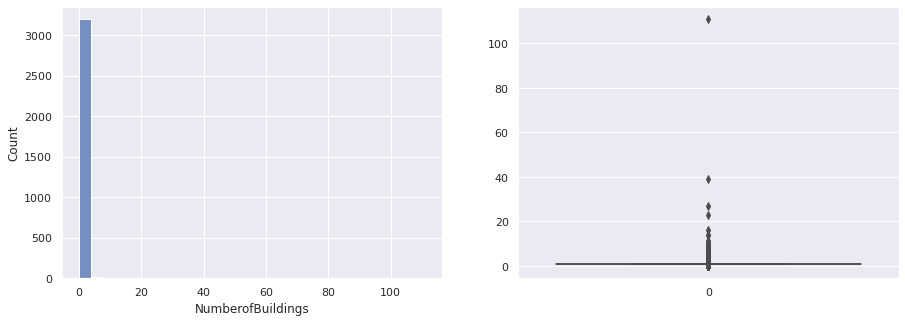

In [200]:
#Histogrammes de distribution et boxplots'
var = 'NumberofBuildings'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [201]:
data['NumberofBuildings'].describe()

count    3229.000000
mean        1.119232
std         2.248440
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64

In [202]:
data['BuildingType'][data['NumberofBuildings']==111]

6614    Campus
Name: BuildingType, dtype: object

In [203]:
data['BuildingType'][data['NumberofBuildings']>=10]

127     Campus
161     Campus
1508    Campus
2015    Campus
3445    Campus
3468    Campus
3502    Campus
5202    Campus
5333    Campus
5665    Campus
6614    Campus
Name: BuildingType, dtype: object

<AxesSubplot:>

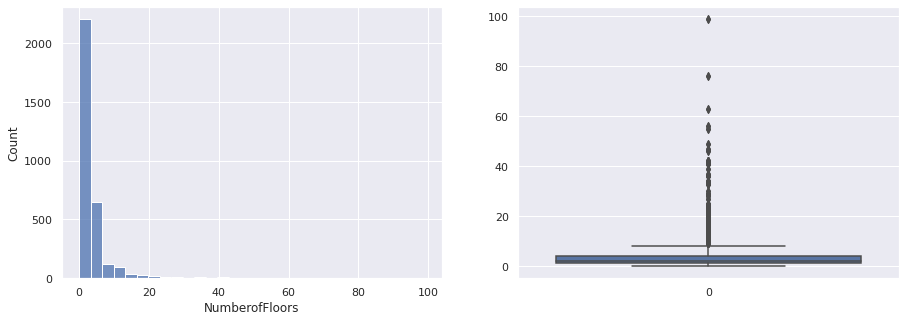

In [204]:
#Histogrammes de distribution et boxplots'
var = 'NumberofFloors'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [205]:
data['NumberofFloors'].describe()

count    3223.000000
mean        4.154514
std         6.645148
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        99.000000
Name: NumberofFloors, dtype: float64

In [206]:
data['BuildingType'][data['NumberofFloors']>=76]

581     NonResidential
1371    NonResidential
3899    NonResidential
4699    NonResidential
Name: BuildingType, dtype: object

In [207]:
data.loc[data['NumberofFloors']>76, 'NumberofFloors'] = np.nan

<AxesSubplot:>

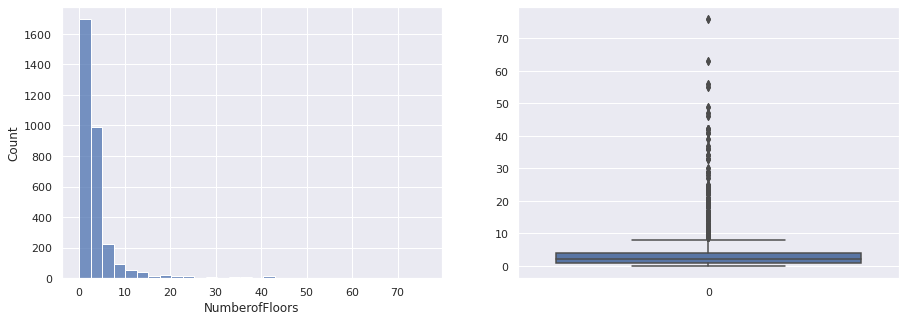

In [208]:
#Histogrammes de distribution et boxplots'
var = 'NumberofFloors'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [209]:
data['NumberofFloors'].describe()

count    3221.000000
mean        4.095622
std         6.212454
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        76.000000
Name: NumberofFloors, dtype: float64

<AxesSubplot:>

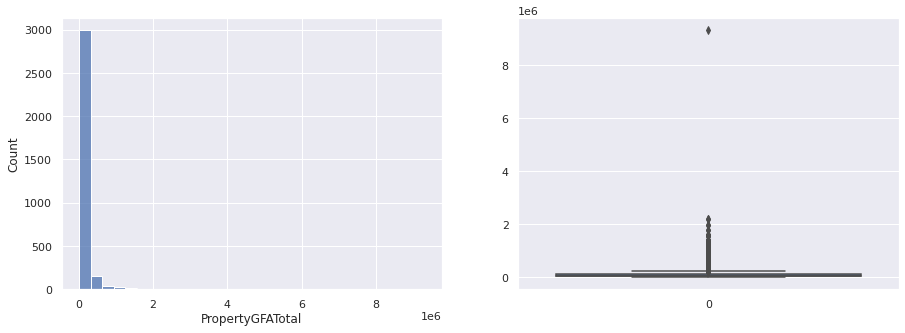

In [210]:
#Histogrammes de distribution et boxplots'
var = 'PropertyGFATotal'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [211]:
data['PropertyGFATotal'].describe()

count    3.231000e+03
mean     1.171234e+05
std      2.541199e+05
min      1.128500e+04
25%      2.996200e+04
50%      4.995000e+04
75%      1.060205e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64

In [212]:
data['BuildingType'][data['PropertyGFATotal']>=8*10**6]

6614    Campus
Name: BuildingType, dtype: object

<AxesSubplot:>

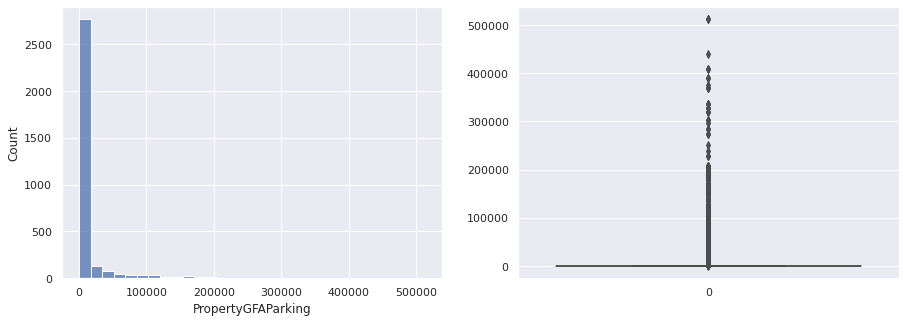

In [213]:
#Histogrammes de distribution et boxplots'
var = 'PropertyGFAParking'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [214]:
data['PropertyGFAParking'].describe()

count      3231.000000
mean      13478.075518
std       44040.612482
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64

In [215]:
data.loc[data['PropertyGFAParking']<0, 'PropertyGFAParking'] = np.nan

<AxesSubplot:>

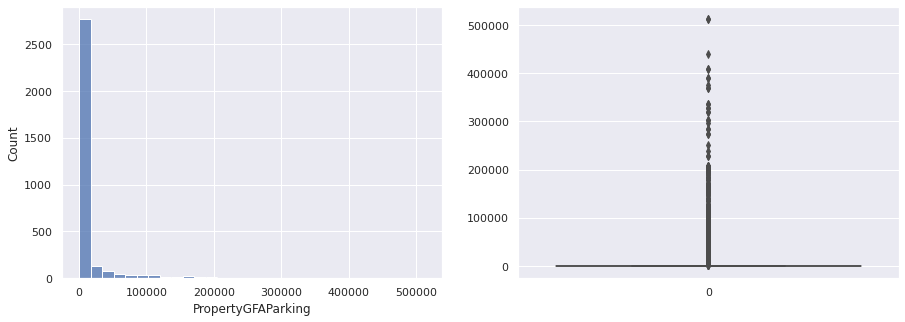

In [216]:
#Histogrammes de distribution et boxplots'
var = 'PropertyGFAParking'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [217]:
data['PropertyGFAParking'].describe()

count      3230.000000
mean      13482.248916
std       44046.792493
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64

<AxesSubplot:>

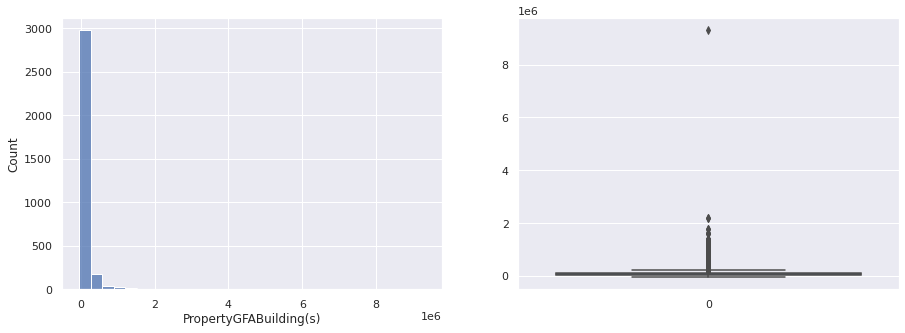

In [218]:
#Histogrammes de distribution et boxplots'
var = 'PropertyGFABuilding(s)'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [219]:
data['PropertyGFABuilding(s)'].describe()

count    3.231000e+03
mean     1.036454e+05
std      2.369290e+05
min     -5.055000e+04
25%      2.876000e+04
50%      4.786300e+04
75%      9.492400e+04
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64

In [220]:
data['BuildingType'][data['PropertyGFABuilding(s)']>=8*10**6]

6614    Campus
Name: BuildingType, dtype: object

In [221]:
data.loc[data['PropertyGFABuilding(s)']<0, 'PropertyGFABuilding(s)'] = np.nan

<AxesSubplot:>

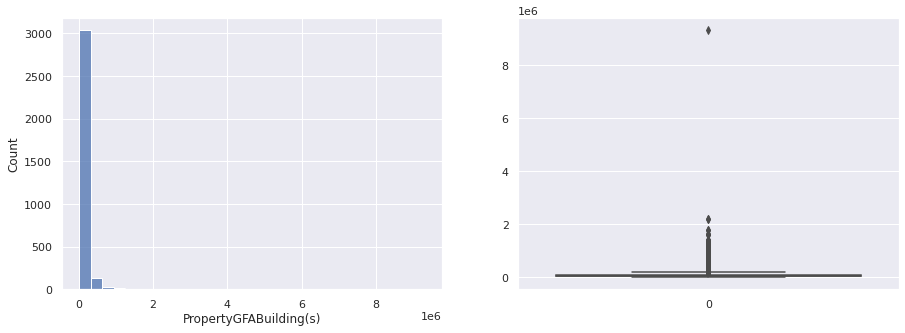

In [222]:
#Histogrammes de distribution et boxplots'
var = 'PropertyGFABuilding(s)'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [223]:
data['PropertyGFABuilding(s)'].describe()

count    3.229000e+03
mean     1.037386e+05
std      2.369727e+05
min      3.636000e+03
25%      2.880000e+04
50%      4.799200e+04
75%      9.494800e+04
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64

<AxesSubplot:>

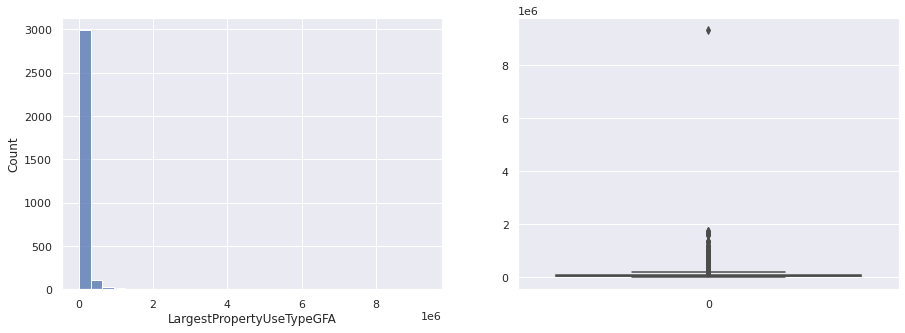

In [224]:
#Histogrammes de distribution et boxplots'
var = 'LargestPropertyUseTypeGFA'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [225]:
data['LargestPropertyUseTypeGFA'].describe()

count    3.160000e+03
mean     9.659334e+04
std      2.302886e+05
min      5.656000e+03
25%      2.573750e+04
50%      4.358550e+04
75%      9.153200e+04
max      9.320156e+06
Name: LargestPropertyUseTypeGFA, dtype: float64

In [226]:
data['BuildingType'][data['LargestPropertyUseTypeGFA']>=8*10**6]

6614    Campus
Name: BuildingType, dtype: object

<AxesSubplot:>

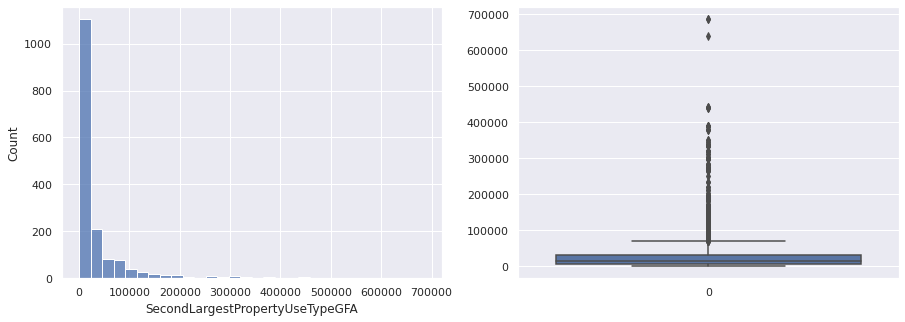

In [227]:
#Histogrammes de distribution et boxplots'
var = 'SecondLargestPropertyUseTypeGFA'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [228]:
data['SecondLargestPropertyUseTypeGFA'].describe()

count      1638.000000
mean      36381.293222
std       68649.225384
min           0.000000
25%        5564.250000
50%       12379.000000
75%       31269.250000
max      686750.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

In [229]:
data['BuildingType'][data['SecondLargestPropertyUseTypeGFA']>=500000]

305     NonResidential
3375            Campus
3644    NonResidential
Name: BuildingType, dtype: object

<AxesSubplot:>

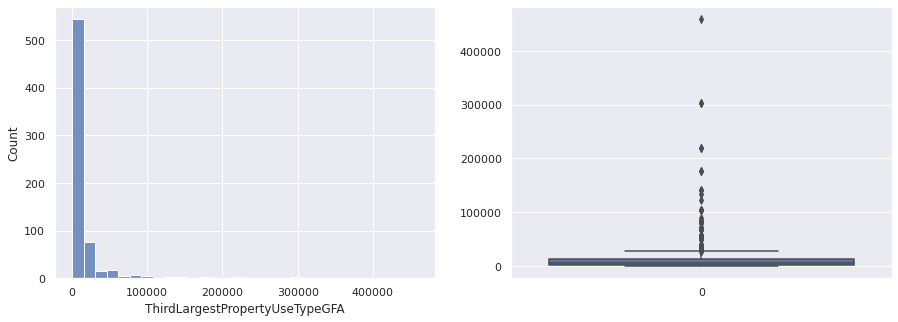

In [230]:
#Histogrammes de distribution et boxplots'
var = 'ThirdLargestPropertyUseTypeGFA'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [231]:
data['ThirdLargestPropertyUseTypeGFA'].describe()

count       678.000000
mean      14037.841296
std       32873.684225
min           0.000000
25%        2608.750000
50%        6000.000000
75%       12359.000000
max      459748.000000
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64

In [232]:
data['BuildingType'][data['ThirdLargestPropertyUseTypeGFA']>=300000]

492     NonResidential
3375            Campus
3830    NonResidential
Name: BuildingType, dtype: object

<AxesSubplot:>

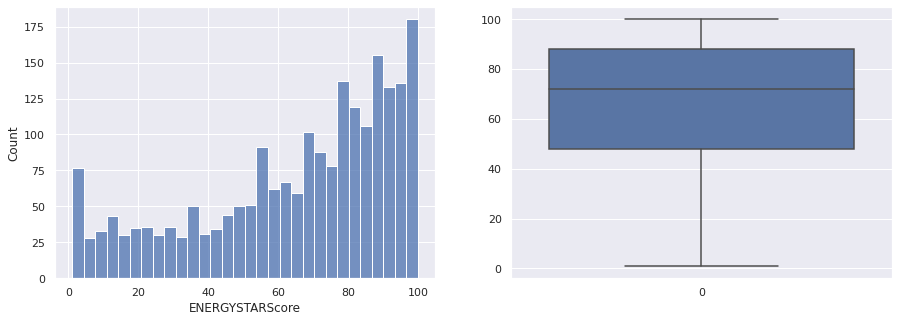

In [233]:
#Histogrammes de distribution et boxplots'
var = 'ENERGYSTARScore'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [234]:
data['ENERGYSTARScore'].describe()

count    2150.000000
mean       64.821860
std        28.252524
min         1.000000
25%        48.000000
50%        72.000000
75%        88.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

<AxesSubplot:>

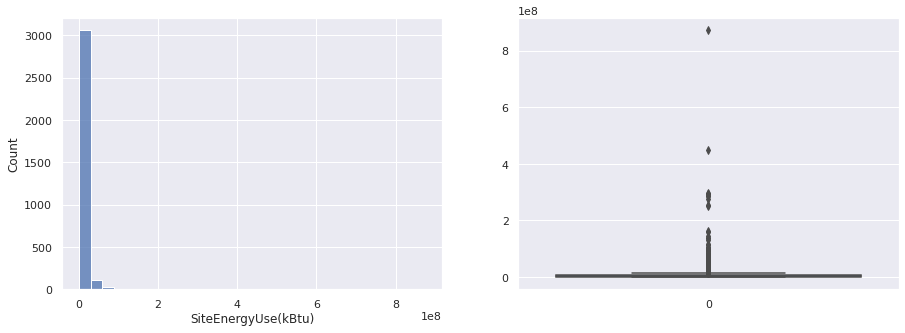

In [235]:
#Histogrammes de distribution et boxplots'
var = 'SiteEnergyUse(kBtu)'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [236]:
data['SiteEnergyUse(kBtu)'].describe()

count    3.224000e+03
mean     8.139577e+06
std      2.553620e+07
min      0.000000e+00
25%      1.242800e+06
50%      2.554947e+06
75%      6.962459e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [237]:
data['BuildingType'][data['SiteEnergyUse(kBtu)']>=2*10**8]

123     NonResidential
170     NonResidential
560     NonResidential
621     NonResidential
3375            Campus
3464    NonResidential
3510    NonResidential
3898    NonResidential
3958    NonResidential
6614            Campus
Name: BuildingType, dtype: object

In [238]:
data_tot = data.copy()
print(data_tot.shape)

(3231, 23)


In [239]:
data_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 6715
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     3231 non-null   object 
 1   PrimaryPropertyType              3231 non-null   object 
 2   CouncilDistrictCode              3231 non-null   object 
 3   Neighborhood                     3231 non-null   object 
 4   YearBuilt                        3231 non-null   int64  
 5   NumberofBuildings                3229 non-null   float64
 6   NumberofFloors                   3221 non-null   float64
 7   PropertyGFATotal                 3231 non-null   int64  
 8   PropertyGFAParking               3230 non-null   float64
 9   PropertyGFABuilding(s)           3229 non-null   float64
 10  ListOfAllPropertyUseTypes        3168 non-null   object 
 11  LargestPropertyUseType           3160 non-null   object 
 12  LargestPropertyUseTy

<AxesSubplot:>

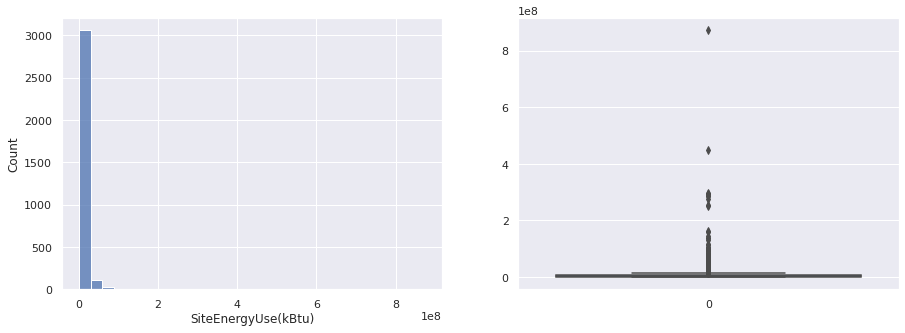

In [243]:
#Histogrammes de distribution et boxplots'
var = 'SiteEnergyUse(kBtu)'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data_tot, x=var, bins=30, ax=ax1)
sns.boxplot(data = data_tot[var], ax=ax2)

In [241]:
data.loc[data['SiteEnergyUse(kBtu)']>=2*10**8, 'SiteEnergyUse(kBtu)'] = np.nan

<AxesSubplot:>

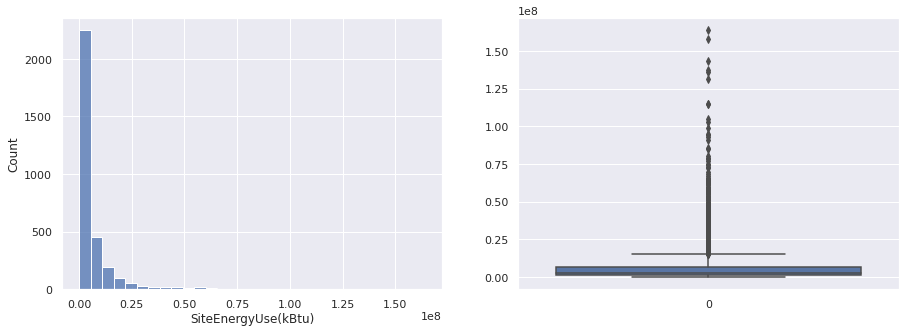

In [242]:
#Histogrammes de distribution et boxplots'
var = 'SiteEnergyUse(kBtu)'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

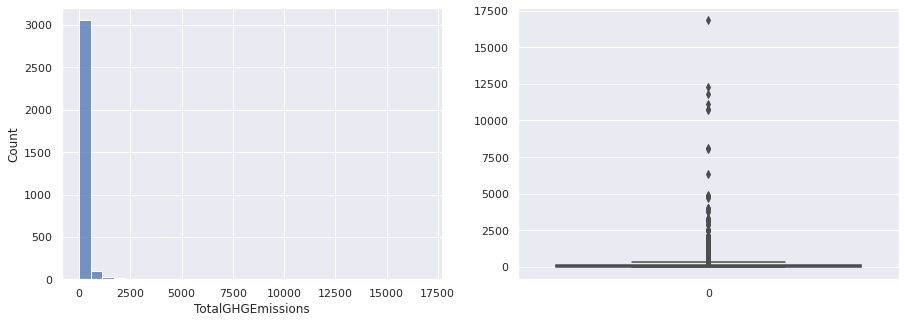

In [244]:
#Histogrammes de distribution et boxplots'
var = 'TotalGHGEmissions'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [245]:
data['TotalGHGEmissions'].describe()

count     3224.000000
mean       179.128886
std        674.026074
min         -0.800000
25%         20.040000
50%         49.365000
75%        139.350000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [246]:
data['BuildingType'][data['TotalGHGEmissions']>=12500]

3375    Campus
Name: BuildingType, dtype: object

In [247]:
data.loc[data['TotalGHGEmissions']<0, 'TotalGHGEmissions'] = np.nan

<AxesSubplot:>

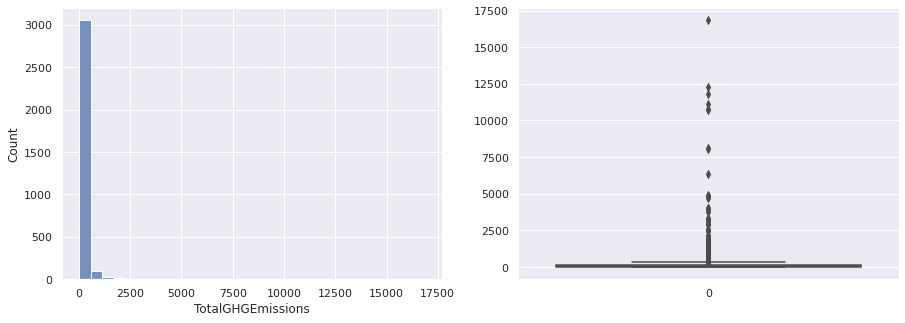

In [248]:
#Histogrammes de distribution et boxplots'
var = 'TotalGHGEmissions'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [249]:
data['TotalGHGEmissions'].describe()

count     3223.000000
mean       179.184713
std        674.123208
min          0.000000
25%         20.070000
50%         49.440000
75%        139.360000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [250]:
data['BuildingType'][data['TotalGHGEmissions']>=12500]

3375    Campus
Name: BuildingType, dtype: object

<AxesSubplot:>

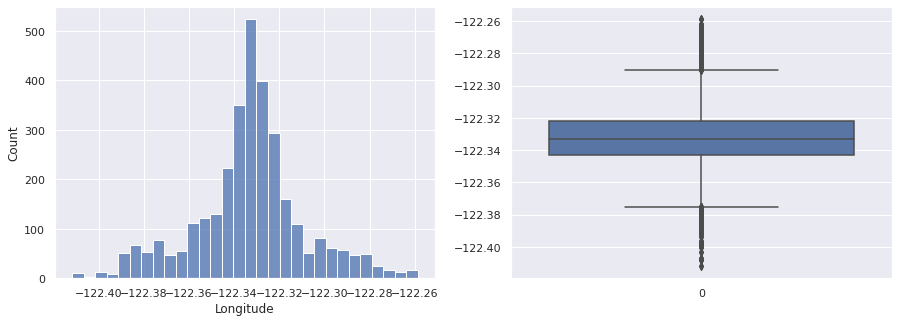

In [251]:
#Histogrammes de distribution et boxplots'
var = 'Longitude'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [252]:
data['Longitude'].describe()

count    3231.000000
mean     -122.333112
std         0.024584
min      -122.411820
25%      -122.343303
50%      -122.333030
75%      -122.322081
max      -122.258640
Name: Longitude, dtype: float64

<AxesSubplot:>

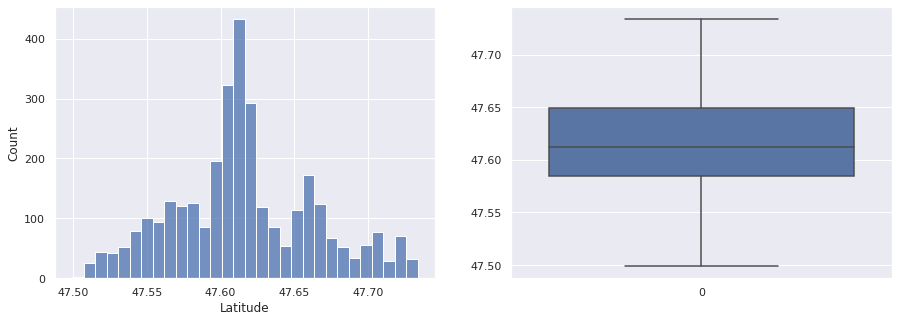

In [253]:
#Histogrammes de distribution et boxplots'
var = 'Latitude'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [254]:
data['Latitude'].describe()

count    3231.000000
mean       47.615738
std         0.048385
min        47.499170
25%        47.584878
50%        47.612129
75%        47.648744
max        47.733870
Name: Latitude, dtype: float64

### Les valeurs manquantes

In [255]:
data.isna().mean()

BuildingType                       0.000000
PrimaryPropertyType                0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000619
NumberofFloors                     0.003095
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000310
PropertyGFABuilding(s)             0.000619
ListOfAllPropertyUseTypes          0.019499
LargestPropertyUseType             0.021975
LargestPropertyUseTypeGFA          0.021975
SecondLargestPropertyUseType       0.493036
SecondLargestPropertyUseTypeGFA    0.493036
ThirdLargestPropertyUseType        0.790158
ThirdLargestPropertyUseTypeGFA     0.790158
ENERGYSTARScore                    0.334571
SiteEnergyUse(kBtu)                0.005262
TotalGHGEmissions                  0.002476
ZipCode                            0.004952
Latitude                           0.000000
Longitude                       

In [256]:
data_tot.isna().mean()

BuildingType                       0.000000
PrimaryPropertyType                0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000619
NumberofFloors                     0.003095
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000310
PropertyGFABuilding(s)             0.000619
ListOfAllPropertyUseTypes          0.019499
LargestPropertyUseType             0.021975
LargestPropertyUseTypeGFA          0.021975
SecondLargestPropertyUseType       0.493036
SecondLargestPropertyUseTypeGFA    0.493036
ThirdLargestPropertyUseType        0.790158
ThirdLargestPropertyUseTypeGFA     0.790158
ENERGYSTARScore                    0.334571
SiteEnergyUse(kBtu)                0.002167
TotalGHGEmissions                  0.002167
ZipCode                            0.004952
Latitude                           0.000000
Longitude                       

#### Imputation des variables quantitatives (par KNN)

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 6715
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     3231 non-null   object 
 1   PrimaryPropertyType              3231 non-null   object 
 2   CouncilDistrictCode              3231 non-null   object 
 3   Neighborhood                     3231 non-null   object 
 4   YearBuilt                        3231 non-null   int64  
 5   NumberofBuildings                3229 non-null   float64
 6   NumberofFloors                   3221 non-null   float64
 7   PropertyGFATotal                 3231 non-null   int64  
 8   PropertyGFAParking               3230 non-null   float64
 9   PropertyGFABuilding(s)           3229 non-null   float64
 10  ListOfAllPropertyUseTypes        3168 non-null   object 
 11  LargestPropertyUseType           3160 non-null   object 
 12  LargestPropertyUseTy

In [258]:
data['ZipCode'] = data['ZipCode'].astype(float)

In [259]:
data['CouncilDistrictCode'] = data['CouncilDistrictCode'].astype(int)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 6715
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     3231 non-null   object 
 1   PrimaryPropertyType              3231 non-null   object 
 2   CouncilDistrictCode              3231 non-null   int64  
 3   Neighborhood                     3231 non-null   object 
 4   YearBuilt                        3231 non-null   int64  
 5   NumberofBuildings                3229 non-null   float64
 6   NumberofFloors                   3221 non-null   float64
 7   PropertyGFATotal                 3231 non-null   int64  
 8   PropertyGFAParking               3230 non-null   float64
 9   PropertyGFABuilding(s)           3229 non-null   float64
 10  ListOfAllPropertyUseTypes        3168 non-null   object 
 11  LargestPropertyUseType           3160 non-null   object 
 12  LargestPropertyUseTy

In [261]:
data_qut = data.drop(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType',
                      'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType','ListOfAllPropertyUseTypes'], axis=1)
print(data_qut.shape)

(3231, 16)


In [262]:
imputer = KNNImputer(n_neighbors=3)

In [263]:
data_qut_imput = imputer.fit_transform(data_qut)

In [264]:
data_qut_imput =pd.DataFrame(data_qut_imput, columns=data_qut.columns)

In [265]:
data_qut_imput.isna().mean()

CouncilDistrictCode                0.0
YearBuilt                          0.0
NumberofBuildings                  0.0
NumberofFloors                     0.0
PropertyGFATotal                   0.0
PropertyGFAParking                 0.0
PropertyGFABuilding(s)             0.0
LargestPropertyUseTypeGFA          0.0
SecondLargestPropertyUseTypeGFA    0.0
ThirdLargestPropertyUseTypeGFA     0.0
ENERGYSTARScore                    0.0
SiteEnergyUse(kBtu)                0.0
TotalGHGEmissions                  0.0
ZipCode                            0.0
Latitude                           0.0
Longitude                          0.0
dtype: float64

In [266]:
data_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 6715
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     3231 non-null   object 
 1   PrimaryPropertyType              3231 non-null   object 
 2   CouncilDistrictCode              3231 non-null   object 
 3   Neighborhood                     3231 non-null   object 
 4   YearBuilt                        3231 non-null   int64  
 5   NumberofBuildings                3229 non-null   float64
 6   NumberofFloors                   3221 non-null   float64
 7   PropertyGFATotal                 3231 non-null   int64  
 8   PropertyGFAParking               3230 non-null   float64
 9   PropertyGFABuilding(s)           3229 non-null   float64
 10  ListOfAllPropertyUseTypes        3168 non-null   object 
 11  LargestPropertyUseType           3160 non-null   object 
 12  LargestPropertyUseTy

In [267]:
data_tot['ZipCode'] = data_tot['ZipCode'].astype(float)

In [268]:
data_tot['CouncilDistrictCode'] = data_tot['CouncilDistrictCode'].astype(int)

In [269]:
data_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 6715
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     3231 non-null   object 
 1   PrimaryPropertyType              3231 non-null   object 
 2   CouncilDistrictCode              3231 non-null   int64  
 3   Neighborhood                     3231 non-null   object 
 4   YearBuilt                        3231 non-null   int64  
 5   NumberofBuildings                3229 non-null   float64
 6   NumberofFloors                   3221 non-null   float64
 7   PropertyGFATotal                 3231 non-null   int64  
 8   PropertyGFAParking               3230 non-null   float64
 9   PropertyGFABuilding(s)           3229 non-null   float64
 10  ListOfAllPropertyUseTypes        3168 non-null   object 
 11  LargestPropertyUseType           3160 non-null   object 
 12  LargestPropertyUseTy

In [270]:
data_tot_qut = data_tot.drop(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType',
                      'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType','ListOfAllPropertyUseTypes'],
                             axis=1)
print(data_tot_qut.shape)

(3231, 16)


In [273]:
imputer = KNNImputer(n_neighbors=3)

In [274]:
data_tot_qut_imput = imputer.fit_transform(data_tot_qut)

In [275]:
data_tot_qut_imput =pd.DataFrame(data_tot_qut_imput, columns=data_tot_qut.columns)

In [276]:
data_tot_qut_imput.isna().mean()

CouncilDistrictCode                0.0
YearBuilt                          0.0
NumberofBuildings                  0.0
NumberofFloors                     0.0
PropertyGFATotal                   0.0
PropertyGFAParking                 0.0
PropertyGFABuilding(s)             0.0
LargestPropertyUseTypeGFA          0.0
SecondLargestPropertyUseTypeGFA    0.0
ThirdLargestPropertyUseTypeGFA     0.0
ENERGYSTARScore                    0.0
SiteEnergyUse(kBtu)                0.0
TotalGHGEmissions                  0.0
ZipCode                            0.0
Latitude                           0.0
Longitude                          0.0
dtype: float64

#### Cas des variables qualitatives

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 6715
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     3231 non-null   object 
 1   PrimaryPropertyType              3231 non-null   object 
 2   CouncilDistrictCode              3231 non-null   int64  
 3   Neighborhood                     3231 non-null   object 
 4   YearBuilt                        3231 non-null   int64  
 5   NumberofBuildings                3229 non-null   float64
 6   NumberofFloors                   3221 non-null   float64
 7   PropertyGFATotal                 3231 non-null   int64  
 8   PropertyGFAParking               3230 non-null   float64
 9   PropertyGFABuilding(s)           3229 non-null   float64
 10  ListOfAllPropertyUseTypes        3168 non-null   object 
 11  LargestPropertyUseType           3160 non-null   object 
 12  LargestPropertyUseTy

In [278]:
data_qlt = data.drop(data_qut, axis=1)
print(data_qlt.shape)

(3231, 7)


In [279]:
data_qlt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 6715
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   BuildingType                  3231 non-null   object
 1   PrimaryPropertyType           3231 non-null   object
 2   Neighborhood                  3231 non-null   object
 3   ListOfAllPropertyUseTypes     3168 non-null   object
 4   LargestPropertyUseType        3160 non-null   object
 5   SecondLargestPropertyUseType  1638 non-null   object
 6   ThirdLargestPropertyUseType   678 non-null    object
dtypes: object(7)
memory usage: 331.0+ KB


In [280]:
data_qlt.isna().mean()

BuildingType                    0.000000
PrimaryPropertyType             0.000000
Neighborhood                    0.000000
ListOfAllPropertyUseTypes       0.019499
LargestPropertyUseType          0.021975
SecondLargestPropertyUseType    0.493036
ThirdLargestPropertyUseType     0.790158
dtype: float64

In [281]:
data_tot_qlt = data_tot.drop(data_tot_qut, axis=1)
print(data_tot_qlt.shape)

(3231, 7)


In [282]:
data_tot_qlt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 6715
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   BuildingType                  3231 non-null   object
 1   PrimaryPropertyType           3231 non-null   object
 2   Neighborhood                  3231 non-null   object
 3   ListOfAllPropertyUseTypes     3168 non-null   object
 4   LargestPropertyUseType        3160 non-null   object
 5   SecondLargestPropertyUseType  1638 non-null   object
 6   ThirdLargestPropertyUseType   678 non-null    object
dtypes: object(7)
memory usage: 331.0+ KB


In [283]:
data_tot_qlt.isna().mean()

BuildingType                    0.000000
PrimaryPropertyType             0.000000
Neighborhood                    0.000000
ListOfAllPropertyUseTypes       0.019499
LargestPropertyUseType          0.021975
SecondLargestPropertyUseType    0.493036
ThirdLargestPropertyUseType     0.790158
dtype: float64

In [284]:
print(data_qlt.shape) #déjà fait
data_qlt = data_qlt.drop(['ListOfAllPropertyUseTypes'], axis=1)
print(data_qlt.shape)

(3231, 7)
(3231, 6)


In [285]:
print(data_tot_qlt.shape)
data_tot_qlt = data_tot_qlt.drop(['ListOfAllPropertyUseTypes'], axis=1)
print(data_tot_qlt.shape)

(3231, 7)
(3231, 6)


In [286]:
data_qlt['LargestPropertyUseType'] = data_qlt['LargestPropertyUseType'].astype(str)
data_qlt['SecondLargestPropertyUseType'] = data_qlt['SecondLargestPropertyUseType'].astype(str)
data_qlt['ThirdLargestPropertyUseType'] = data_qlt['ThirdLargestPropertyUseType'].astype(str)

In [287]:
data_qlt.isna().mean()

BuildingType                    0.0
PrimaryPropertyType             0.0
Neighborhood                    0.0
LargestPropertyUseType          0.0
SecondLargestPropertyUseType    0.0
ThirdLargestPropertyUseType     0.0
dtype: float64

In [288]:
data_tot_qlt['LargestPropertyUseType'] = data_tot_qlt['LargestPropertyUseType'].astype(str)
data_tot_qlt['SecondLargestPropertyUseType'] = data_tot_qlt['SecondLargestPropertyUseType'].astype(str)
data_tot_qlt['ThirdLargestPropertyUseType'] = data_tot_qlt['ThirdLargestPropertyUseType'].astype(str)

In [289]:
data_tot_qlt.isna().mean()

BuildingType                    0.0
PrimaryPropertyType             0.0
Neighborhood                    0.0
LargestPropertyUseType          0.0
SecondLargestPropertyUseType    0.0
ThirdLargestPropertyUseType     0.0
dtype: float64

In [290]:
print(data_qut_imput.shape)
print(data_qlt.shape)

(3231, 16)
(3231, 6)


In [291]:
data_qut_imput.reset_index(inplace = True)
data_qlt.reset_index(inplace = True)

In [292]:
data_imput = pd.concat([data_qut_imput,data_qlt], axis=1,  ignore_index = False)
print(data_imput.shape)

(3231, 24)


In [293]:
data_imput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            3231 non-null   int64  
 1   CouncilDistrictCode              3231 non-null   float64
 2   YearBuilt                        3231 non-null   float64
 3   NumberofBuildings                3231 non-null   float64
 4   NumberofFloors                   3231 non-null   float64
 5   PropertyGFATotal                 3231 non-null   float64
 6   PropertyGFAParking               3231 non-null   float64
 7   PropertyGFABuilding(s)           3231 non-null   float64
 8   LargestPropertyUseTypeGFA        3231 non-null   float64
 9   SecondLargestPropertyUseTypeGFA  3231 non-null   float64
 10  ThirdLargestPropertyUseTypeGFA   3231 non-null   float64
 11  ENERGYSTARScore                  3231 non-null   float64
 12  SiteEnergyUse(kBtu) 

In [294]:
#je supprime la colonne 'index'
data_imput = data_imput.drop(['index'], axis=1)
print(data_imput.shape)

(3231, 22)


In [295]:
#Je transforme le ZipCode et le code district en entier
data_imput['ZipCode'] = data_imput['ZipCode'].astype(int)
data_imput['CouncilDistrictCode'] = data_imput['CouncilDistrictCode'].astype(int)

In [296]:
data_imput.isna().mean()

CouncilDistrictCode                0.0
YearBuilt                          0.0
NumberofBuildings                  0.0
NumberofFloors                     0.0
PropertyGFATotal                   0.0
PropertyGFAParking                 0.0
PropertyGFABuilding(s)             0.0
LargestPropertyUseTypeGFA          0.0
SecondLargestPropertyUseTypeGFA    0.0
ThirdLargestPropertyUseTypeGFA     0.0
ENERGYSTARScore                    0.0
SiteEnergyUse(kBtu)                0.0
TotalGHGEmissions                  0.0
ZipCode                            0.0
Latitude                           0.0
Longitude                          0.0
BuildingType                       0.0
PrimaryPropertyType                0.0
Neighborhood                       0.0
LargestPropertyUseType             0.0
SecondLargestPropertyUseType       0.0
ThirdLargestPropertyUseType        0.0
dtype: float64

In [297]:
print(data_tot_qut_imput.shape)
print(data_tot_qlt.shape)

(3231, 16)
(3231, 6)


In [298]:
data_tot_qut_imput.reset_index(inplace = True)
data_tot_qlt.reset_index(inplace = True)

In [299]:
data_tot_imput = pd.concat([data_tot_qut_imput,data_tot_qlt], axis=1,  ignore_index = False)
print(data_tot_imput.shape)

(3231, 24)


In [300]:
data_tot_imput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            3231 non-null   int64  
 1   CouncilDistrictCode              3231 non-null   float64
 2   YearBuilt                        3231 non-null   float64
 3   NumberofBuildings                3231 non-null   float64
 4   NumberofFloors                   3231 non-null   float64
 5   PropertyGFATotal                 3231 non-null   float64
 6   PropertyGFAParking               3231 non-null   float64
 7   PropertyGFABuilding(s)           3231 non-null   float64
 8   LargestPropertyUseTypeGFA        3231 non-null   float64
 9   SecondLargestPropertyUseTypeGFA  3231 non-null   float64
 10  ThirdLargestPropertyUseTypeGFA   3231 non-null   float64
 11  ENERGYSTARScore                  3231 non-null   float64
 12  SiteEnergyUse(kBtu) 

In [301]:
#je supprime la colonne 'index'
data_tot_imput = data_tot_imput.drop(['index'], axis=1)
print(data_tot_imput.shape)

(3231, 22)


In [302]:
#Je transforme le ZipCode et le code district en entier
data_tot_imput['ZipCode'] = data_tot_imput['ZipCode'].astype(int)
data_tot_imput['CouncilDistrictCode'] = data_tot_imput['CouncilDistrictCode'].astype(int)

In [303]:
data_tot_imput.isna().mean()

CouncilDistrictCode                0.0
YearBuilt                          0.0
NumberofBuildings                  0.0
NumberofFloors                     0.0
PropertyGFATotal                   0.0
PropertyGFAParking                 0.0
PropertyGFABuilding(s)             0.0
LargestPropertyUseTypeGFA          0.0
SecondLargestPropertyUseTypeGFA    0.0
ThirdLargestPropertyUseTypeGFA     0.0
ENERGYSTARScore                    0.0
SiteEnergyUse(kBtu)                0.0
TotalGHGEmissions                  0.0
ZipCode                            0.0
Latitude                           0.0
Longitude                          0.0
BuildingType                       0.0
PrimaryPropertyType                0.0
Neighborhood                       0.0
LargestPropertyUseType             0.0
SecondLargestPropertyUseType       0.0
ThirdLargestPropertyUseType        0.0
dtype: float64

## Recherche de corrélations

### Entre variables  quantitatives

In [304]:
data_qut_imput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            3231 non-null   int64  
 1   CouncilDistrictCode              3231 non-null   float64
 2   YearBuilt                        3231 non-null   float64
 3   NumberofBuildings                3231 non-null   float64
 4   NumberofFloors                   3231 non-null   float64
 5   PropertyGFATotal                 3231 non-null   float64
 6   PropertyGFAParking               3231 non-null   float64
 7   PropertyGFABuilding(s)           3231 non-null   float64
 8   LargestPropertyUseTypeGFA        3231 non-null   float64
 9   SecondLargestPropertyUseTypeGFA  3231 non-null   float64
 10  ThirdLargestPropertyUseTypeGFA   3231 non-null   float64
 11  ENERGYSTARScore                  3231 non-null   float64
 12  SiteEnergyUse(kBtu) 

In [305]:
#je supprime la colonne 'index'
data_qut_imput = data_qut_imput.drop(['index'], axis=1)

In [306]:
#Je transforme le ZipCode en entier
data_qut_imput['ZipCode'] = data_qut_imput['ZipCode'].astype(int)

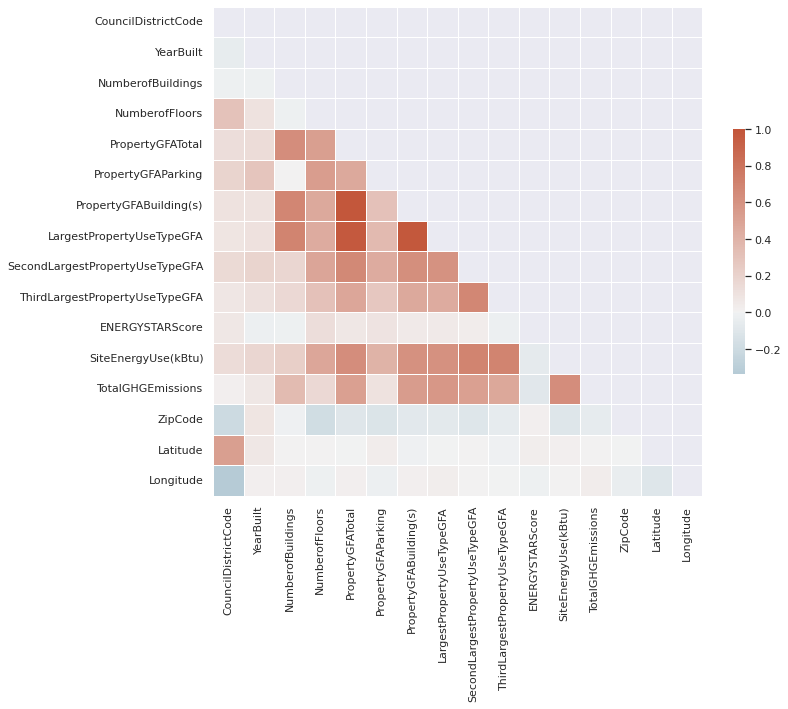

In [307]:
#Heatmap des corrélations pour les variables quantitatives :

corr = data_qut_imput.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Entre les targets et les principales variables de catégories

In [311]:
data_imput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CouncilDistrictCode              3231 non-null   int64  
 1   YearBuilt                        3231 non-null   float64
 2   NumberofBuildings                3231 non-null   float64
 3   NumberofFloors                   3231 non-null   float64
 4   PropertyGFATotal                 3231 non-null   float64
 5   PropertyGFAParking               3231 non-null   float64
 6   PropertyGFABuilding(s)           3231 non-null   float64
 7   LargestPropertyUseTypeGFA        3231 non-null   float64
 8   SecondLargestPropertyUseTypeGFA  3231 non-null   float64
 9   ThirdLargestPropertyUseTypeGFA   3231 non-null   float64
 10  ENERGYSTARScore                  3231 non-null   float64
 11  SiteEnergyUse(kBtu)              3231 non-null   float64
 12  TotalGHGEmissions   

(0.0, 100000000.0)

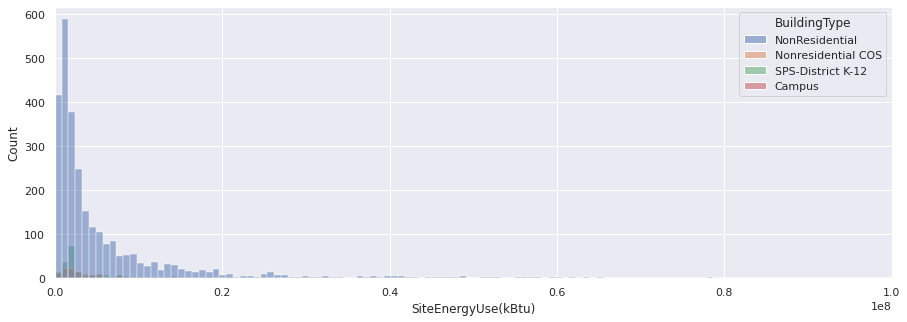

In [312]:
var="SiteEnergyUse(kBtu)"

fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(10,8)})
sns.histplot(data_imput, x=var, hue="BuildingType", bins=200)

ax.set_xlim(0, 1*10**8)

(0.0, 100000000.0)

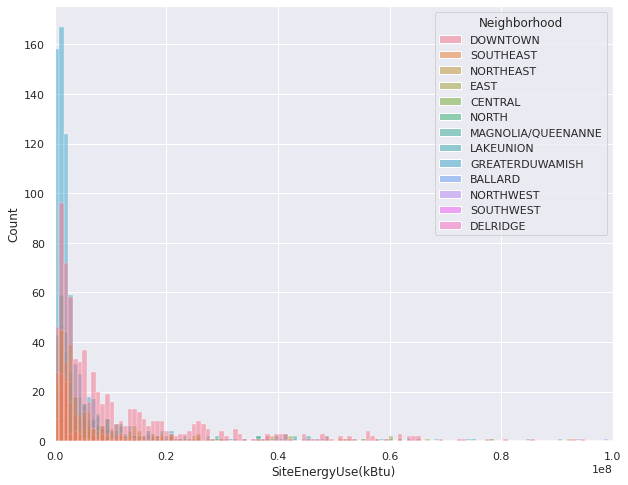

In [313]:
var="SiteEnergyUse(kBtu)"

fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(10,8)})
sns.histplot(data_imput, x=var, hue="Neighborhood", bins=200)

ax.set_xlim(0, 1*10**8)

(0.0, 2500.0)

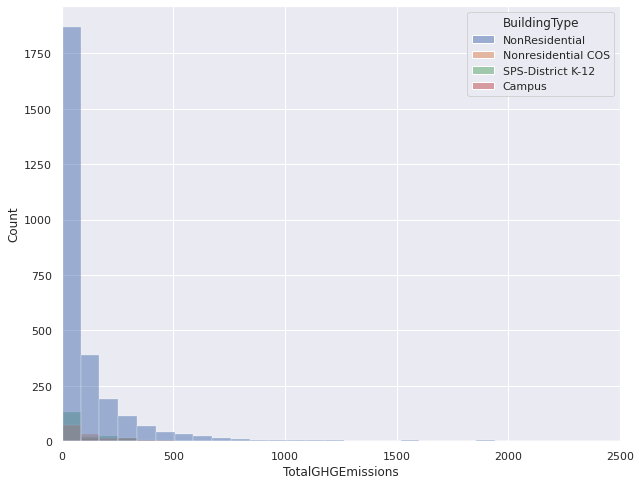

In [314]:
var="TotalGHGEmissions"

fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(5,8)})
sns.histplot(data_imput, x=var, hue="BuildingType", bins=200)

ax.set_xlim(0, 2500)

(0.0, 2500.0)

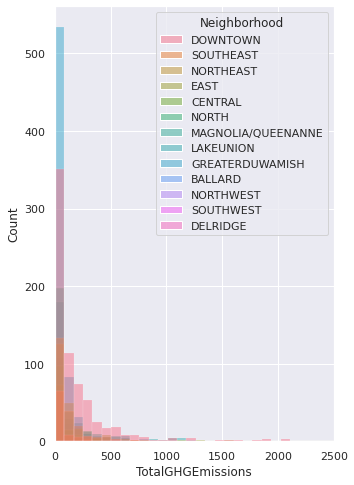

In [315]:
var="TotalGHGEmissions"

fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(5,10)})
sns.histplot(data_imput, x=var, hue="Neighborhood", bins=200)

ax.set_xlim(0, 2500)

## Export des données

In [316]:
data_imput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CouncilDistrictCode              3231 non-null   int64  
 1   YearBuilt                        3231 non-null   float64
 2   NumberofBuildings                3231 non-null   float64
 3   NumberofFloors                   3231 non-null   float64
 4   PropertyGFATotal                 3231 non-null   float64
 5   PropertyGFAParking               3231 non-null   float64
 6   PropertyGFABuilding(s)           3231 non-null   float64
 7   LargestPropertyUseTypeGFA        3231 non-null   float64
 8   SecondLargestPropertyUseTypeGFA  3231 non-null   float64
 9   ThirdLargestPropertyUseTypeGFA   3231 non-null   float64
 10  ENERGYSTARScore                  3231 non-null   float64
 11  SiteEnergyUse(kBtu)              3231 non-null   float64
 12  TotalGHGEmissions   

In [317]:
data_imput.isna().mean()

CouncilDistrictCode                0.0
YearBuilt                          0.0
NumberofBuildings                  0.0
NumberofFloors                     0.0
PropertyGFATotal                   0.0
PropertyGFAParking                 0.0
PropertyGFABuilding(s)             0.0
LargestPropertyUseTypeGFA          0.0
SecondLargestPropertyUseTypeGFA    0.0
ThirdLargestPropertyUseTypeGFA     0.0
ENERGYSTARScore                    0.0
SiteEnergyUse(kBtu)                0.0
TotalGHGEmissions                  0.0
ZipCode                            0.0
Latitude                           0.0
Longitude                          0.0
BuildingType                       0.0
PrimaryPropertyType                0.0
Neighborhood                       0.0
LargestPropertyUseType             0.0
SecondLargestPropertyUseType       0.0
ThirdLargestPropertyUseType        0.0
dtype: float64

In [318]:
data_imput.describe()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,ZipCode,Latitude,Longitude
count,3231.000000,3231.000000,3231.000000,3231.000000,3.231000e+03,3231.000000,3.231000e+03,3.231000e+03,3231.000000,3231.000000,3231.000000,3.231000e+03,3231.000000,3231.000000,3231.000000,3231.000000
mean,4.360569,1961.912411,1.119158,4.098525,1.171234e+05,13480.182400,1.036975e+05,9.654776e+04,30186.534973,13976.603558,63.049727,7.201475e+06,178.840405,98116.562365,47.615738,-122.333112
std,2.202232,32.517727,2.247746,6.211452,2.541199e+05,44040.130229,2.369051e+05,2.285206e+05,61595.768645,35172.257780,26.411191,1.362199e+07,673.324402,16.906290,0.048385,0.024584
min,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000e+00,0.000000,98006.000000,47.499170,-122.411820
25%,2.000000,1930.000000,1.000000,1.000000,2.996200e+04,0.000000,2.880000e+04,2.575300e+04,6122.333333,3245.000000,45.500000,1.243047e+06,20.070000,98105.000000,47.584878,-122.343303
50%,4.000000,1965.000000,1.000000,2.000000,4.995000e+04,0.000000,4.786300e+04,4.372800e+04,10185.000000,5173.000000,67.666667,2.553764e+06,49.280000,98109.000000,47.612129,-122.333030
75%,7.000000,1989.000000,1.000000,4.000000,1.060205e+05,0.000000,9.492400e+04,9.178417e+04,21632.333333,9034.833333,85.000000,6.926601e+06,139.225000,98125.000000,47.648744,-122.322081
max,7.000000,2015.000000,111.000000,76.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,1.639460e+08,16870.980000,98199.000000,47.733870,-122.258640


In [319]:
data_imput.to_csv ('data_nett.csv', index = False, header=True)

In [320]:
data_tot_imput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CouncilDistrictCode              3231 non-null   int64  
 1   YearBuilt                        3231 non-null   float64
 2   NumberofBuildings                3231 non-null   float64
 3   NumberofFloors                   3231 non-null   float64
 4   PropertyGFATotal                 3231 non-null   float64
 5   PropertyGFAParking               3231 non-null   float64
 6   PropertyGFABuilding(s)           3231 non-null   float64
 7   LargestPropertyUseTypeGFA        3231 non-null   float64
 8   SecondLargestPropertyUseTypeGFA  3231 non-null   float64
 9   ThirdLargestPropertyUseTypeGFA   3231 non-null   float64
 10  ENERGYSTARScore                  3231 non-null   float64
 11  SiteEnergyUse(kBtu)              3231 non-null   float64
 12  TotalGHGEmissions   

In [321]:
data_tot_imput.isna().mean()

CouncilDistrictCode                0.0
YearBuilt                          0.0
NumberofBuildings                  0.0
NumberofFloors                     0.0
PropertyGFATotal                   0.0
PropertyGFAParking                 0.0
PropertyGFABuilding(s)             0.0
LargestPropertyUseTypeGFA          0.0
SecondLargestPropertyUseTypeGFA    0.0
ThirdLargestPropertyUseTypeGFA     0.0
ENERGYSTARScore                    0.0
SiteEnergyUse(kBtu)                0.0
TotalGHGEmissions                  0.0
ZipCode                            0.0
Latitude                           0.0
Longitude                          0.0
BuildingType                       0.0
PrimaryPropertyType                0.0
Neighborhood                       0.0
LargestPropertyUseType             0.0
SecondLargestPropertyUseType       0.0
ThirdLargestPropertyUseType        0.0
dtype: float64

In [322]:
data_tot_imput.describe()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,ZipCode,Latitude,Longitude
count,3231.000000,3231.000000,3231.000000,3231.000000,3.231000e+03,3231.000000,3.231000e+03,3.231000e+03,3231.000000,3231.000000,3231.000000,3.231000e+03,3231.000000,3231.000000,3231.000000,3231.000000
mean,4.360569,1961.912411,1.119158,4.095223,1.171234e+05,13480.182400,1.036975e+05,9.634884e+04,27045.291601,9295.346775,62.928608,8.128023e+06,178.838591,98116.562365,47.615738,-122.333112
std,2.202232,32.517727,2.247746,6.206307,2.541199e+05,44040.130229,2.369051e+05,2.282520e+05,53177.391245,19505.875790,26.392687,2.550981e+07,673.324878,16.906290,0.048385,0.024584
min,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000e+00,-0.800000,98006.000000,47.499170,-122.411820
25%,2.000000,1930.000000,1.000000,1.000000,2.996200e+04,0.000000,2.880000e+04,2.575300e+04,6122.333333,3245.000000,45.000000,1.243047e+06,20.070000,98105.000000,47.584878,-122.343303
50%,4.000000,1965.000000,1.000000,2.000000,4.995000e+04,0.000000,4.786300e+04,4.372800e+04,10185.000000,5171.000000,67.000000,2.553764e+06,49.280000,98109.000000,47.612129,-122.333030
75%,7.000000,1989.000000,1.000000,4.000000,1.060205e+05,0.000000,9.492400e+04,9.164500e+04,21454.000000,8973.666667,85.000000,6.926601e+06,139.225000,98125.000000,47.648744,-122.322081
max,7.000000,2015.000000,111.000000,76.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,8.739237e+08,16870.980000,98199.000000,47.733870,-122.258640


In [323]:
data_tot_imput.to_csv ('data_tot_nett.csv', index = False, header=True)